# **Investigation into the Effect of Dimensionality Reduction Techniques in Machine Learning Algorithms**

## **Background and Context**

Dataset provided by the Centers for Disease Control and Prevention, which includes 253,680 survey responses covering various health indicators. 

### **Goal**

The goal of the project is to delve into the efficacy of dimensionality reduction techniques, notably Principal Component Analysis (PCA) Linear Discriminant Analysis (LDA) and Autoencoders, in enhancing the accuracy and efficiency of machine learning algorithms.

<b>Data Dictionary</b>:

- Diabetes_binary: Binary indication of the presence of diabetes (1 for Yes, 0 for No)

- HighBP, HighChol, CholCheck: Indicators of blood pressure, cholesterol level, and cholesterol check, respectively.

- BMI: Body Mass Index, a measure of body fat.

- Smoker, Stroke, HeartDiseaseorAttack: Binary indicators for smoking habits, stroke occurrence, and heart disease or attacks.

- PhysActivity, Fruits, Veggies: Indicators of physical activity levels and dietary habits.

- HvyAlcoholConsump, AnyHealthcare, NoDocbcCost: Indicators of heavy alcohol consumption, access to healthcare, and avoidance of doctors due to cost.

- GenHlth, MentHlth, PhysHlth: General, mental, and physical health scores.

- DiffWalk: Difficulty in walking as a binary indicator.

- Sex, Age, Education, Income: Demographic details of the individual

# **Import necessary libraries**

In [1]:
# Importing essential libraries for data handling and analysis
import pandas as pd  # Data manipulation and analysis
import numpy as np   # Numerical operations

# Preprocessing and model evaluation tools
from sklearn.model_selection import train_test_split, cross_val_score  # Splitting data and cross-validation
from sklearn.preprocessing import StandardScaler  # Feature scaling
from imblearn.over_sampling import RandomOverSampler  # Oversampling for imbalanced data

# Imputation for handling missing values
from sklearn.impute import SimpleImputer

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Model performance metrics
from sklearn.metrics import (accuracy_score, recall_score, auc, precision_score, 
                             f1_score, confusion_matrix, classification_report,
                             precision_recall_curve, roc_auc_score, roc_curve, log_loss)
from sklearn.model_selection import learning_curve

# Dimensionality reduction techniques
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Suppress warnings for cleaner notebook presentation
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set option to display all columns
pd.set_option('display.max_columns', None)

# **Step 1: Exploratory Data Analysis (EDA) and Preprocessing**

- Load the dataset, handle missing values, and perform EDA.<br>

- Split the dataset into features (X) and target (y).<br>

- Normalize the features.<br>

- Split the data into training, validation, and testing sets.<br>

In [3]:
# Load the dataset
# brfss_dataset = brfss_df
brfss_df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [4]:
# Display the first few rows of the dataset
brfss_df.head()

Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  HvyAlcoholConsump  \
0                   0.0           0.0     0.0      1.0                0.0   
1                   0.0           1.0     0.0      0.0                0.0   
2                   0.0           0.0     1.0      0.0                0.0   
3                   0.0           1.0     1.0      1.0                0.0   
4                   0.0           1.0     1.0      1.0                0.0   

   AnyHealthcare  NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  \
0            1.0          0.0      5.0      18.0      15.0       1.0  0.0   
1            0.0          1.0      3.0       0.0       0.0       0.0  0.0   
2            1.0          1.0      5.0      30.0      30.0       1.0  0.0   
3            1.0          0.0      2.0       0.0       0.0       0.0  0.0   
4            1.0          0.0      2.0       3.0       0.0       0.0  0.0   

    Age  Education  Income  
0   9.0        4.0     3.0  
1   7.0        6.0     1.0  
2   9.0        4.0     8.0  
3  11.0        3.0     6.0  
4  11.0        5.0     4.0

In [5]:
# We rename target Diabetes_binary for the purpose of this work
brfss_df.rename(columns={'Diabetes_binary': 'Outcome'}, inplace=True)

In [6]:
# check first dimension of data set
brfss_df.shape

(253680, 22)

The dataset has 253,680 rows and 22 columns

In [7]:
# check duplicates
brfss_df.duplicated().sum()

24206

The dataset has 24206 duplicates. We will drop the duplicates

In [8]:
# Drop duplicates and reset the index
brfss_df = brfss_df.drop_duplicates().reset_index(drop=True)

In [9]:
# Sanity check
brfss_df.shape

(229474, 22)

In [10]:
# Basic information about the dataset
brfss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Outcome               229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

The BRFSS dataset has all the features to be float datatype. For uniformity sake we will convert to integer type

In [11]:
# Convert all columns to integer except 'BMI'
columns_to_convert = [col for col in brfss_df.columns if col != 'BMI']
brfss_df[columns_to_convert] = brfss_df[columns_to_convert].astype(int)

# Display the DataFrame's information to confirm the change
brfss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Outcome               229474 non-null  int32  
 1   HighBP                229474 non-null  int32  
 2   HighChol              229474 non-null  int32  
 3   CholCheck             229474 non-null  int32  
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  int32  
 6   Stroke                229474 non-null  int32  
 7   HeartDiseaseorAttack  229474 non-null  int32  
 8   PhysActivity          229474 non-null  int32  
 9   Fruits                229474 non-null  int32  
 10  Veggies               229474 non-null  int32  
 11  HvyAlcoholConsump     229474 non-null  int32  
 12  AnyHealthcare         229474 non-null  int32  
 13  NoDocbcCost           229474 non-null  int32  
 14  GenHlth               229474 non-null  int32  
 15  

In [12]:
#checking unique values in different variables
unique_values = {}
for col in brfss_df.columns:
    unique_values[col] = brfss_df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

unique value count
Outcome                                2
HighBP                                 2
HighChol                               2
CholCheck                              2
BMI                                   84
Smoker                                 2
Stroke                                 2
HeartDiseaseorAttack                   2
PhysActivity                           2
Fruits                                 2
Veggies                                2
HvyAlcoholConsump                      2
AnyHealthcare                          2
NoDocbcCost                            2
GenHlth                                5
MentHlth                              31
PhysHlth                              31
DiffWalk                               2
Sex                                    2
Age                                   13
Education                              6
Income                                 8

In [13]:
# Check for missing values
brfss_df.isnull().sum()

Outcome                 0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

There are no missing values

In [14]:
# Summary statistics
brfss_df.describe()

Outcome         HighBP       HighChol      CholCheck  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.152945       0.454343       0.441640       0.959481   
std         0.359936       0.497912       0.496584       0.197173   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

                 BMI        Smoker         Stroke  HeartDiseaseorAttack  \
count  229474.000000  229474.00000  229474.000000         229474.000000   
mean       28.687507       0.46580       0.044816              0.103336   
std         6.789204       0.49883       0.206899              0.304398   
min        12.000000       0.00000       0.000000              0.000000   
25%        24.000000       0.00000       0.000000              0.000000   
50%        27.000000       0.00000       0.000000              0.000000   
75%        32.000000       1.00000       0.000000              0.000000   
max        98.000000       1.00000       1.000000              1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  229474.000000  229474.000000  229474.000000      229474.000000   
mean        0.733042       0.612675       0.794587           0.060791   
std         0.442371       0.487140       0.404004           0.238947   
min         0.000000       0.000000       0.000000           0.000000   
25%         0.000000       0.000000       1.000000           0.000000   
50%         1.000000       1.000000       1.000000           0.000000   
75%         1.000000       1.000000       1.000000           0.000000   
max         1.000000       1.000000       1.000000           1.000000   

       AnyHealthcare    NoDocbcCost        GenHlth       MentHlth  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        0.946011       0.092921       2.601820       3.509866   
std         0.225996       0.290323       1.064962       7.717643   
min         0.000000       0.000000       1.000000       0.000000   
25%         1.000000       0.000000       2.000000       0.000000   
50%         1.000000       0.000000       3.000000       0.000000   
75%         1.000000       0.000000       3.000000       2.000000   
max         1.000000       1.000000       5.000000      30.000000   

            PhysHlth       DiffWalk            Sex            Age  \
count  229474.000000  229474.000000  229474.000000  229474.000000   
mean        4.681219       0.185751       0.439087       8.085068   
std         9.050877       0.388906       0.496277       3.094451   
min         0.000000       0.000000       0.000000       1.000000   
25%         0.000000       0.000000       0.000000       6.000000   
50%         0.000000       0.000000       0.000000       8.000000   
75%         4.000000       0.000000       1.000000      10.000000   
max        30.000000       1.000000       1.000000      13.000000   

           Education         Income  
count  229474.000000  229474.000000  
mean        4.979741       5.888615  
std         0.992989       2.092888  
min         1.000000       1.000000  
25%         4.000000       4.000000  
50%         5.000000       6.000000  
75%         6.000000       8.000000  
max         6.000000       8.000000

The dataset has 229,474 records, with each record representing an individual's responses across various health-related attributes


- Outcome: About 15% of individuals have the condition being studied.
- HighBP (High Blood Pressure): 45% report having high blood pressure.
- HighChol (High Cholesterol): Roughly 44% have high cholesterol.
- CholCheck (Cholesterol Check): A high proportion (96%) have had their cholesterol checked.
- BMI (Body Mass Index): Average BMI is around 28.69, indicating a population leaning towards overweight.
- Smoking: Nearly 47% of the population are smokers.
- Stroke: About 4.5% have experienced a stroke.
- HeartDiseaseorAttack: Around 10% have a history of heart disease or attack.
- PhysActivity: 73% engage in physical activity.
- Fruits and Veggies Consumption: Over 60% regularly consume fruits, while approximately 80% consume vegetables.
- HvyAlcoholConsump (Heavy Alcohol Consumption): Notably low at about 6%.
- AnyHealthcare: A high percentage (94.6%) have access to healthcare.
- NoDocbcCost (No Doctor Due to Cost): A small percentage (9.3%) avoid doctors due to cost.
- GenHlth (General Health): Average general health score is around 2.6.
- MentHlth (Mental Health) and PhysHlth (Physical Health): Indicate a lower average of mental and physical health issues.
- DiffWalk (Difficulty Walking): About 19% face difficulty in walking.
- Sex: Slightly skewed towards one gender (43.9%).
- Age: Average age category is around 8.
- Education and Income: Indicate a relatively high level of education and income.

In [15]:
# Create a copy of the dataframe
data = brfss_df.copy()

## **Exploratory Data Analysis**

- We will visualize the data to understand distributions, relationships, and potential anomalies

####  - UNIVARIATE

In [16]:
# Count the frequency of each class in the 'Outcome' column
data["Outcome"].value_counts()

Outcome
0    194377
1     35097
Name: count, dtype: int64

In [17]:
# Set a color palette for Seaborn
sns.set_palette("pastel")

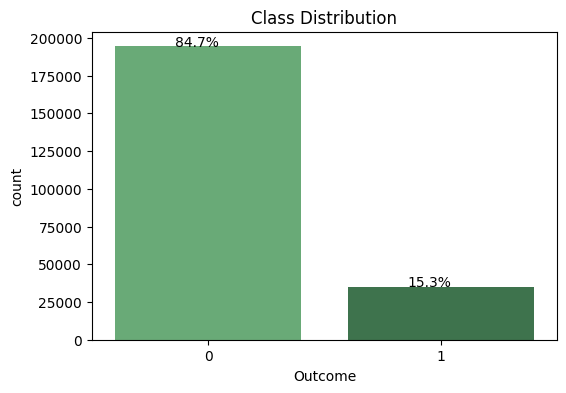

In [18]:
# Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Outcome', data=data, palette = 'Greens_d')
plt.title('Class Distribution')

# Calculate percentages and annotate
total = len(data['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
    
# Saving the plot
plt.savefig('brfss_class_distribution.png')
plt.show()

Data is not balanced . This may cause the model not to perform well due to the influence of the more frequency class

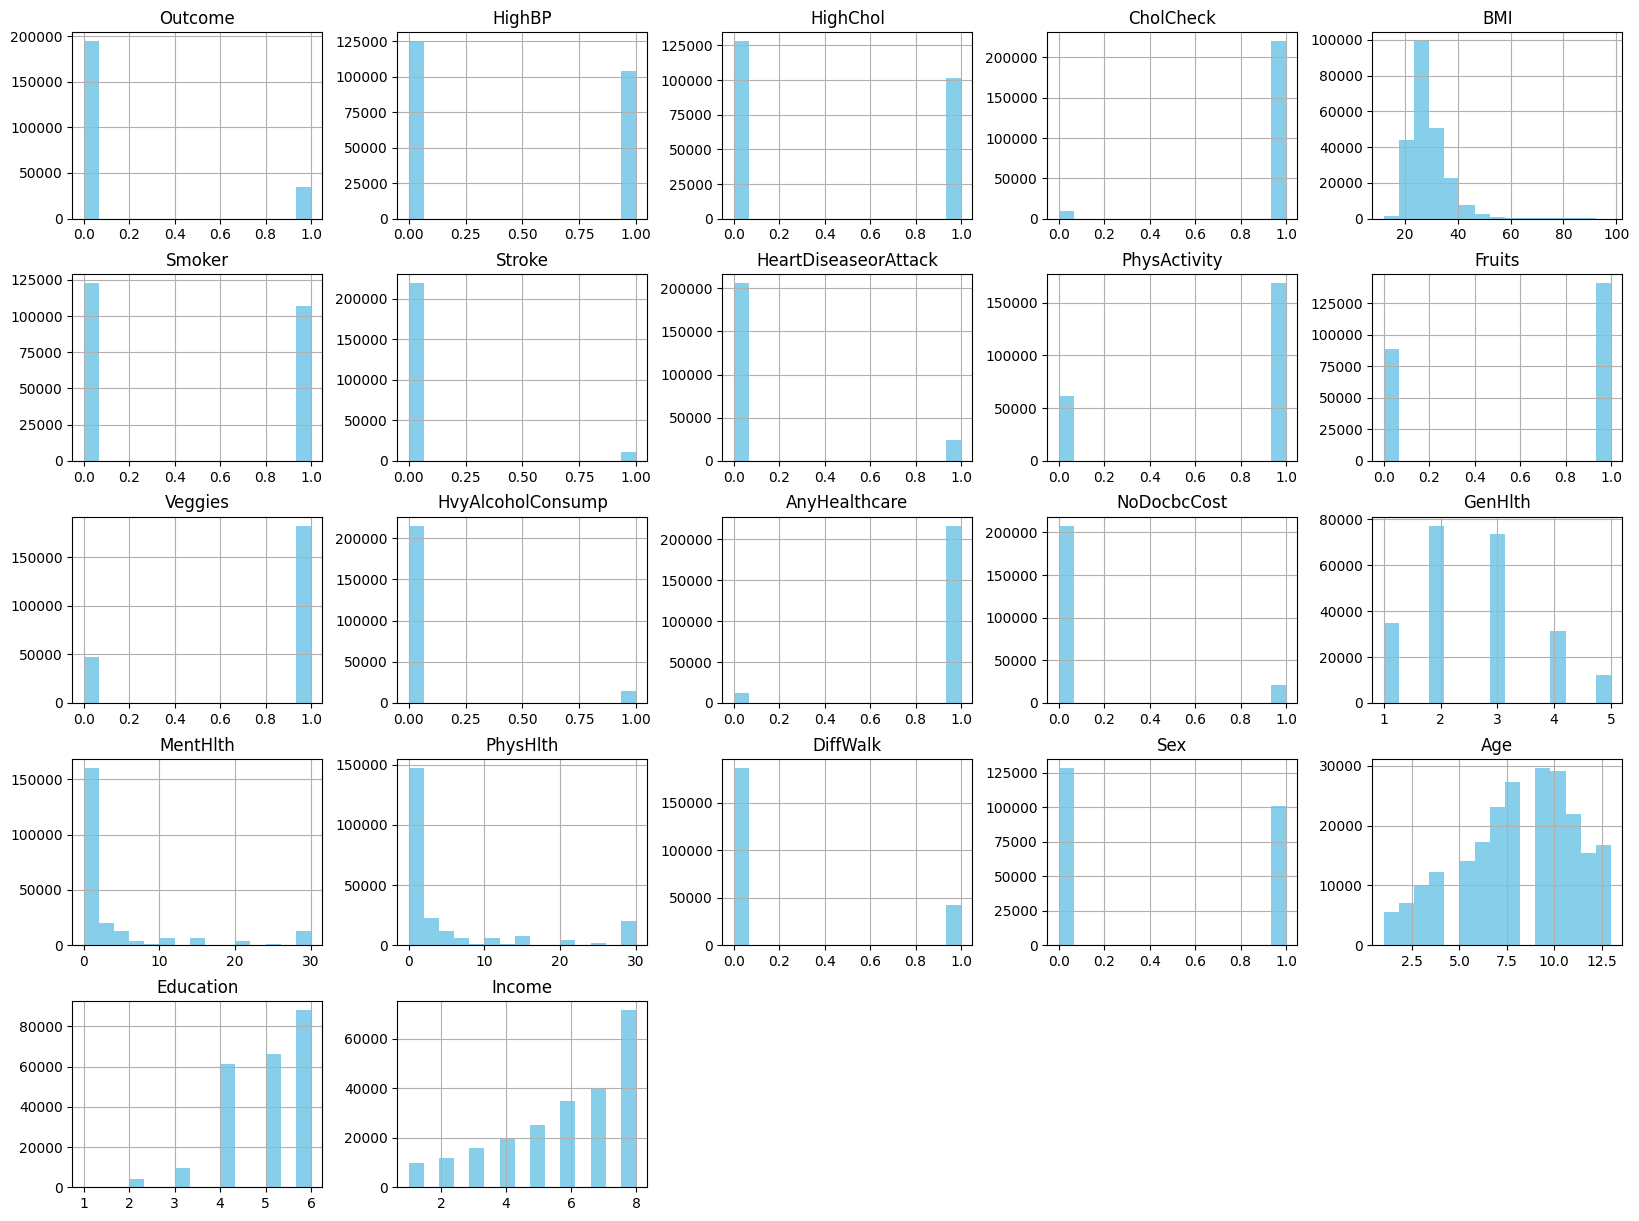

In [19]:
# Histograms for each feature
data.hist(bins=15, figsize=(20, 15), color='skyblue')
plt.show()


From the Histplots it is observed that: 
- The BMI scores lean towards higher values, indicating prevalent overweight or obesity issues.
- Smoking is relatively common, while strokes are less so.
- A smaller section of the population has experienced heart disease or attacks.
- Most individuals are physically active and consume fruits and vegetables regularly, indicating good health practices.
- Heavy alcohol consumption is relatively rare.
- The vast majority have healthcare access, with a small portion avoiding care due to cost.
- General health perceptions are mostly positive.
- Reports of poor mental and physical health days are low for most individuals.
- Difficulty walking is not widespread but is present in a significant minority.
- The gender distribution is balanced.

In [20]:
# Drop the target column
data_without_target = data.drop('Outcome', axis=1)  # Replace 'Outcome' with the name of your target column if different

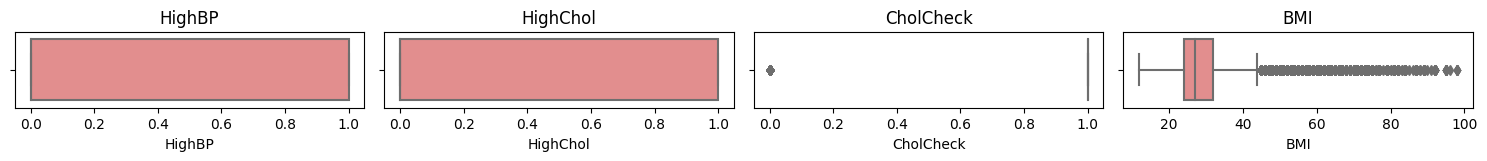

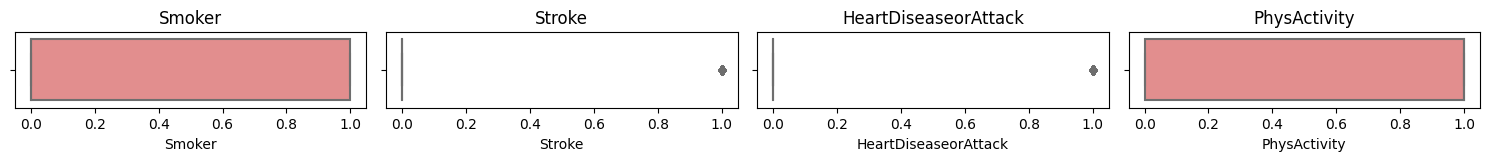

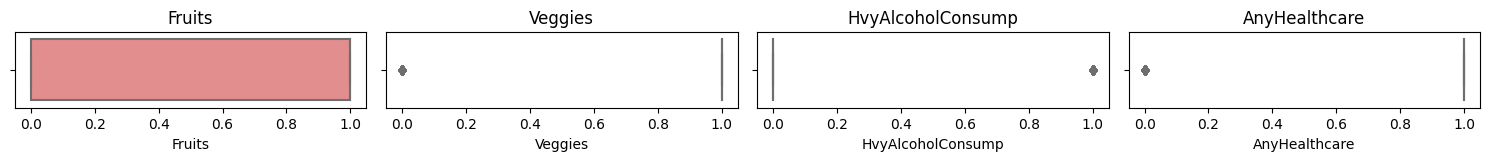

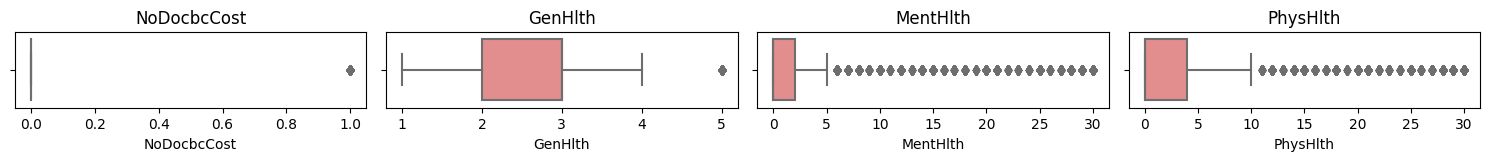

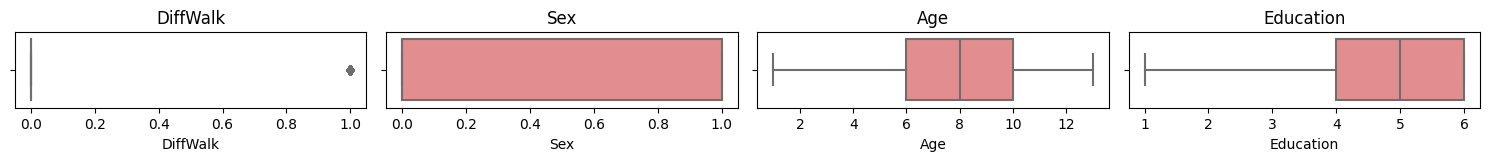

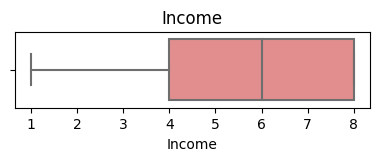

In [21]:
# Boxplots for each feature in a 4x2 grid
num_columns = len(data_without_target.columns)
num_rows = (num_columns + 3) // 4  # Calculate the number of rows needed

for i, column in enumerate(data_without_target.columns):
    if i % 4 == 0:
        # Create a new figure for every 4th boxplot
        fig = plt.figure(figsize=(15, 8))
    
    plt.subplot(num_rows, 4, i % 4 + 1)
    sns.boxplot(x=data_without_target[column], color='lightcoral')
    plt.title(column)

    # If it's the last boxplot in the row or the last boxplot overall, show the plot
    if (i + 1) % 4 == 0 or i == num_columns - 1:
        plt.tight_layout()
        plt.show()
        
        # Save each figure with a unique name
        fig.savefig(f'boxplot1_{i // 4 + 1}.png', dpi=300, bbox_inches='tight')


Addressing outliers is essential in data analysis, as they can skew results and violate assumptions. Instead of removing them, which could lead to data loss, it's better to use scaling and transformation techniques to minimize their impact

## Identify Correlation in data 

**Pearson's Correlation Coefficient** is a metric that reveals the relationship strength between two variables, ranging from -1 to +1, where 1 indicates a strong correlation and 0 indicates none.

**Heat Map** is a visual tool that uses color coding to display complex data patterns in a two-dimensional format, making information easier to understand and analyze

In [22]:
# check for correlation
mat_corr = data.corr()
mat_corr

Outcome    HighBP  HighChol  CholCheck       BMI  \
Outcome               1.000000  0.254318  0.194944   0.072523  0.205086   
HighBP                0.254318  1.000000  0.283963   0.111259  0.194218   
HighChol              0.194944  0.283963  1.000000   0.094772  0.089734   
CholCheck             0.072523  0.111259  0.094772   1.000000  0.042487   
BMI                   0.205086  0.194218  0.089734   0.042487  1.000000   
Smoker                0.045504  0.074264  0.074583  -0.003721 -0.009294   
Stroke                0.099193  0.124558  0.089375   0.027955  0.011006   
HeartDiseaseorAttack  0.168213  0.201443  0.176446   0.050086  0.039820   
PhysActivity         -0.100404 -0.104382 -0.063443  -0.004555 -0.127780   
Fruits               -0.024805 -0.019467 -0.026257   0.017860 -0.067424   
Veggies              -0.041734 -0.042994 -0.027399  -0.000653 -0.044054   
HvyAlcoholConsump    -0.065950 -0.014178 -0.019057  -0.020975 -0.058420   
AnyHealthcare         0.025331  0.052044  0.052363   0.115498 -0.008519   
NoDocbcCost           0.020048  0.002292  0.003020  -0.054128  0.045795   
GenHlth               0.276940  0.272784  0.188139   0.062939  0.208351   
MentHlth              0.054153  0.037482  0.050346  -0.001430  0.068569   
PhysHlth              0.156211  0.144656  0.111008   0.040758  0.102768   
DiffWalk              0.205302  0.211759  0.136045   0.049107  0.182556   
Sex                   0.032724  0.047119  0.022859  -0.024332  0.030902   
Age                   0.177263  0.339802  0.263841   0.095942 -0.049223   
Education            -0.102686 -0.112887 -0.050045  -0.009935 -0.074433   
Income               -0.140659 -0.140030 -0.062089   0.001989 -0.069097   

                        Smoker    Stroke  HeartDiseaseorAttack  PhysActivity  \
Outcome               0.045504  0.099193              0.168213     -0.100404   
HighBP                0.074264  0.124558              0.201443     -0.104382   
HighChol              0.074583  0.089375              0.176446     -0.063443   
CholCheck            -0.003721  0.027955              0.050086     -0.004555   
BMI                  -0.009294  0.011006              0.039820     -0.127780   
Smoker                1.000000  0.054414              0.105169     -0.066869   
Stroke                0.054414  1.000000              0.198814     -0.059306   
HeartDiseaseorAttack  0.105169  0.198814              1.000000     -0.073094   
PhysActivity         -0.066869 -0.059306             -0.073094      1.000000   
Fruits               -0.061731 -0.004486             -0.006946      0.125023   
Veggies              -0.013744 -0.033029             -0.027180      0.135240   
HvyAlcoholConsump     0.096048 -0.021347             -0.035561      0.023378   
AnyHealthcare        -0.013963  0.013627              0.025987      0.023959   
NoDocbcCost           0.037335  0.028613              0.021971     -0.046440   
GenHlth               0.134894  0.169809              0.246328     -0.237511   
MentHlth              0.077641  0.061996              0.052601     -0.105914   
PhysHlth              0.100447  0.140806              0.170335     -0.199307   
DiffWalk              0.108144  0.169339              0.202657     -0.235719   
Sex                   0.096650  0.003626              0.089828      0.033516   
Age                   0.107695  0.128209              0.223912     -0.087881   
Education            -0.135657 -0.064178             -0.082288      0.170931   
Income               -0.095314 -0.117108             -0.122728      0.165869   

                        Fruits   Veggies  HvyAlcoholConsump  AnyHealthcare  \
Outcome              -0.024805 -0.041734          -0.065950       0.025331   
HighBP               -0.019467 -0.042994          -0.014178       0.052044   
HighChol             -0.026257 -0.027399          -0.019057       0.052363   
CholCheck             0.017860 -0.000653          -0.020975       0.115498   
BMI                  -0.067424 -0.044054          -0.058420      -

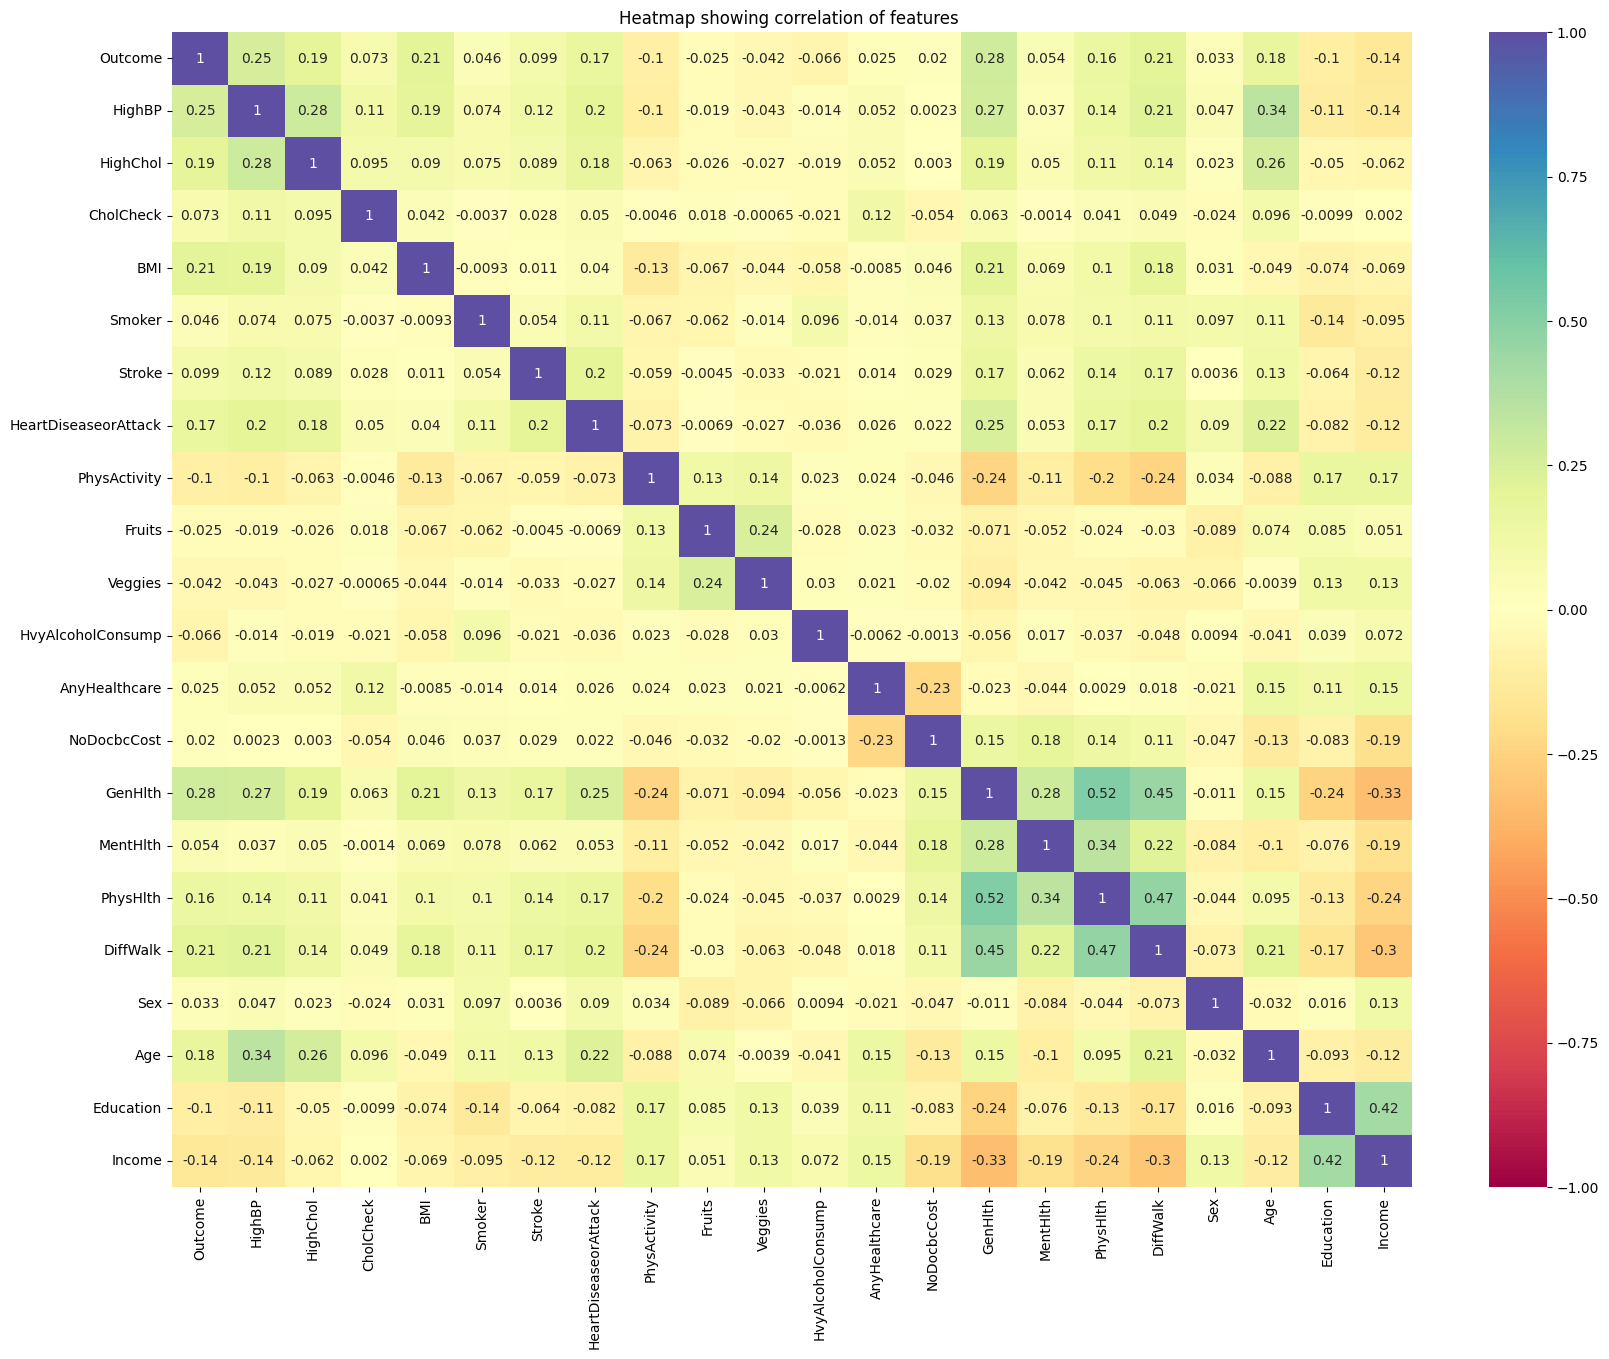

In [23]:
plt.figure(figsize = (20,15))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1, cmap = "Spectral")
plt.title("Heatmap showing correlation of features ");

From the Heat Map it is observed that 

- Outcome and GenHlth (General Health): There's a moderate positive correlation (0.28), indicating that general health perceptions are closely related to the health outcomes of interest.

- Outcome and DiffWalk (Difficulty Walking): Another moderate positive correlation (0.21) suggests that difficulties with walking are associated with negative health outcomes.

- HighBP (High Blood Pressure) and Age: The positive correlation (0.34) indicates that higher blood pressure is more prevalent as age increases.

- HighChol (High Cholesterol) and Age: Similar to HighBP, there's a positive correlation (0.26) with age, implying cholesterol issues increase with age.

- GenHlth and PhysHlth (Physical Health): A strong positive correlation (0.52) suggests that individuals' perceptions of their general health are aligned with their physical health experiences.

- PhysHlth and DiffWalk: A strong correlation (0.47) here indicates that physical health issues are likely to be associated with mobility challenges.

- Education and Income: There's a significant positive correlation (0.42), which suggests higher education levels are associated with higher income brackets.

## Data Preprocessing

### **Splitting the Data**

- Dataset was split into training, validation, and testing sets in an 80:10:10 ratio to avoid overfitting, ensure model generalizability, and validate the model's performance on unseen data 

In [24]:
# Split the dataset into features and target
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [25]:
# Split the data into training (80%) and temporary (20%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Split the temporary set into testing (50%) and validation (50%) sets
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [27]:
# Normalize the features
scaler = StandardScaler()

x_train_sd = scaler.fit_transform(x_train)
x_val_sd = scaler.transform(x_val)
x_test_sd = scaler.transform(x_test)

# **Step 2: Train Models on Original Dataset**

- We'll train Logistic Regression, Random Forest, and Multilayer Perceptron (MLP), XGBoost and Stacking Classifiers on the original dataset and evaluate their performance. The evaluation metrics will include accuracy, recall, precision, ROC/AUC, and the confusion matrix.


#### Train and evaluate the models:
Implement a function to train and evaluate each model, then store the results in a dataframe

In [28]:
def train_and_evaluate(model, X_train_sd, y_train, X_val_sd, y_val, X_test_sd, y_test):
    # Train the model on the normalized training set
    model.fit(X_train_sd, y_train)

    # Predictions on training, validation, and test sets
    y_pred_train = model.predict(X_train_sd)
    y_pred_val = model.predict(X_val_sd)
    y_pred_test = model.predict(X_test_sd)
#     y_pred_proba_test = model.predict_proba(X_test_sd)[:, 1]
    
    # Check if the model supports 'predict_proba' or 'decision_function'
    if hasattr(model, "predict_proba"):
        y_pred_proba_test = model.predict_proba(X_test_sd)[:, 1]
    elif hasattr(model, "decision_function"):
        # Use decision function if predict_proba is not available
        y_pred_proba_test = model.decision_function(X_test_sd)
    else:
        # For models without either method, use the test predictions directly
        y_pred_proba_test = y_pred_test

    # Store metrics
    metrics = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'train_recall': recall_score(y_train, y_pred_train),
        'train_precision': precision_score(y_train, y_pred_train),
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'val_recall': recall_score(y_val, y_pred_val),
        'val_precision': precision_score(y_val, y_pred_val),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'test_recall': recall_score(y_test, y_pred_test),
        'test_precision': precision_score(y_test, y_pred_test),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_test)
    }
    
    # Classification Report
    report = classification_report(y_test, y_pred_test)

    # Store predictions for later use
    predictions = {
        'y_pred_train': y_pred_train,
        'y_pred_val': y_pred_val,
        'y_pred_test': y_pred_test,
        'y_pred_proba_test': y_pred_proba_test  # Store probability or decision function output
    }

    return pd.DataFrame(metrics, index=[0]), report, predictions

In [29]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1500, class_weight='balanced', solver = "liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1, max_depth=20),
    'MLP': MLPClassifier(max_iter=1500),
    'XGBoost': XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss', max_depth = 20, n_jobs= -1),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier())])
}

In [30]:
# Dictionary to store the results, reports, and predictions
results = {}
reports = {}
predictions = {}

for name, model in models.items():
    result, report, prediction = train_and_evaluate(model, x_train_sd, y_train, x_val_sd, y_val, x_test_sd, y_test)
    results[name] = result
    reports[name] = report
    predictions[name] = prediction

### Apply the Dimensionality Reduction Techniques - PCA, LDA, and Autoencoder on Original dataset

#### **Apply Principal Component Analysis (PCA)**

Principal Component Analysis (PCA), is a dimensionality reduction technique commonly used in machine learning and statistics. Its primary goal is to reduce the number of features in a dataset while preserving the most important information or variance in the data. PCA achieves this by transforming the original features into a new set of uncorrelated variables, known as principal components, which are linear combinations of the original features

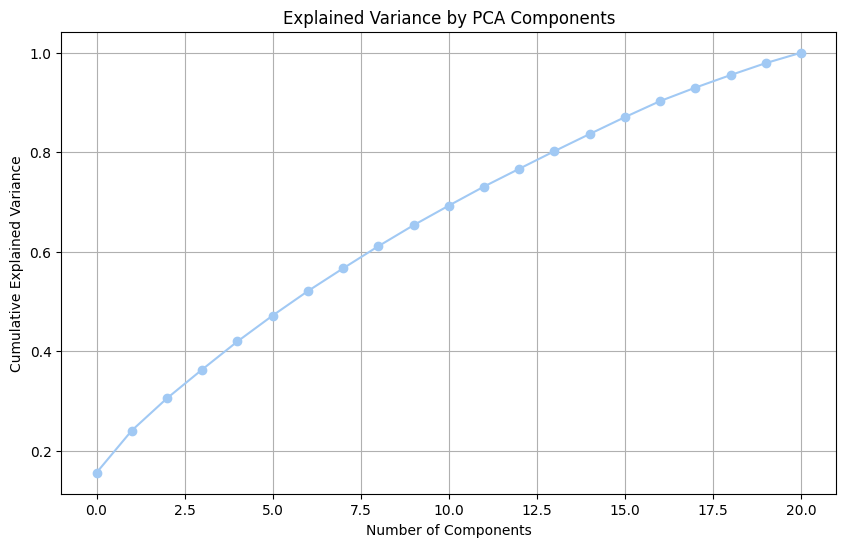

In [31]:
# Apply PCA
pca = PCA()
pca.fit(x_train_sd)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [32]:
pca = PCA(n_components=16)

# Fit and transform with PCA
X_train_pca = pca.fit_transform(x_train_sd)
X_val_pca = pca.transform(x_val_sd)
X_test_pca = pca.transform(x_test_sd)


In [33]:
# Explained variance can help determine the number of components
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = explained_variance.cumsum()
print(cum_explained_variance)

[0.15620572 0.24089031 0.30568529 0.36355427 0.41988019 0.47194278
 0.52110455 0.5667887  0.61123755 0.65345519 0.69280411 0.73111132
 0.7668198  0.80228353 0.8367069  0.87061688]


The 16 components explains 87% of the variance.

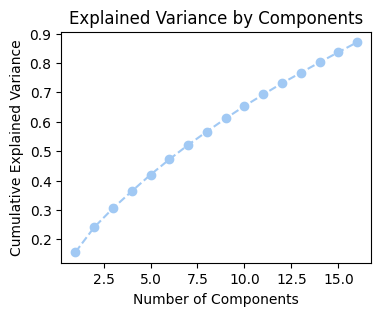

In [34]:
# Visualize

plt.figure(figsize=(4, 3))
plt.plot(range(1, len(explained_variance) + 1), cum_explained_variance, marker='o', linestyle='--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

#### **Apply Linear Discriminant Analysis (LDA)**

- Linear Discriminant Analysis (LDA) is primarily used for dimensionality reduction in the context of supervised classification 
- The LinearDiscriminantAnalysis (LDA) method for dimensionality reduction aims to find a linear combination of features that best separates multiple classes. The n_components parameter in LDA specifies the number of components (features) you want to retain after the transformation.

However, there is an important limitation for LDA: The maximum number of components you can extract with LDA is C-1, where C is the number of classes in your dataset. This is because LDA aims to find axes that maximize the separation between multiple classes, and if you have C classes, there are at most C-1 axes that can separate them.

Our target variable has two classes (binary classification), then even if you set n_components=2 LDA can only extract a single component

In [35]:
lda = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform with LDA
X_train_lda = lda.fit_transform(x_train_sd, y_train)
X_val_lda = lda.transform(x_val_sd)
X_test_lda = lda.transform(x_test_sd)

#### **Apply Autoencoders**

Autoencoders are a type of artificial neural network architecture used for unsupervised learning. They are particularly useful for dimensionality reduction, feature learning, and data compression. The main idea behind autoencoders is to learn a compressed representation, or encoding, of the input data by minimizing the reconstruction error between the input and the output.

The architecture of an autoencoder consists of an encoder and a decoder:

 - Encoder: This part of the network compresses the input data into a lower-dimensional representation (encoding). It consists of one or more hidden layers that reduce the input features to a compact representation.

- Decoder: This part of the network reconstructs the input data from the compressed representation. It mirrors the structure of the encoder but works in reverse, expanding the compressed representation back to the original input space.

- The training process involves minimizing the difference (reconstruction error) between the input and the output. The network learns to capture the most salient features of the data during this process

In [36]:
from keras.models import Sequential
from keras.layers import Dense

def build_custom_autoencoder(input_dim):
    autoencoder = Sequential()
    # Input Layer and first hidden layer
    autoencoder.add(Dense(units=64, activation='relu', input_dim=input_dim))
    # Encoding Layer
    autoencoder.add(Dense(units=16, activation='relu'))  # Bottleneck
    # Decoding Layer
    autoencoder.add(Dense(units=32, activation='relu'))
    # Output Layer
    autoencoder.add(Dense(units=input_dim, activation='sigmoid'))
    
    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder


In [37]:
# Build and train the autoencoder
autoencoder_imbal = build_custom_autoencoder(x_train_sd.shape[1])
autoencoder_imbal.fit(x_train_sd, x_train_sd, epochs=30, batch_size=256, validation_data=(x_val_sd, x_val_sd))


Epoch 1/30
718/718 [==============================] - 1s 895us/step - loss: 0.7275 - val_loss: 0.6208
Epoch 2/30
718/718 [==============================] - 1s 767us/step - loss: 0.6094 - val_loss: 0.6051
Epoch 3/30
718/718 [==============================] - 1s 757us/step - loss: 0.6015 - val_loss: 0.6011
Epoch 4/30
718/718 [==============================] - 1s 759us/step - loss: 0.5989 - val_loss: 0.5995
Epoch 5/30
718/718 [==============================] - 1s 774us/step - loss: 0.5976 - val_loss: 0.5986
Epoch 6/30
718/718 [==============================] - 1s 763us/step - loss: 0.5968 - val_loss: 0.5979
Epoch 7/30
718/718 [==============================] - 1s 765us/step - loss: 0.5964 - val_loss: 0.5975
Epoch 8/30
718/718 [==============================] - 1s 739us/step - loss: 0.5962 - val_loss: 0.5974
Epoch 9/30
718/718 [==============================] - 1s 743us/step - loss: 0.5960 - val_loss: 0.5971
Epoch 10/30
718/718 [==============================] - 1s 742us/step - loss: 0.595

In [38]:
# Define the encoder part (up to the bottleneck layer)
encoder_imbal = Model(inputs=autoencoder_imbal.input, outputs=autoencoder_imbal.layers[1].output)

In [39]:
# Transform the data
X_train_auto_imbal = encoder_imbal.predict(x_train_sd)
X_val_auto_imbal = encoder_imbal.predict(x_val_sd)
X_test_auto_imbal = encoder_imbal.predict(x_test_sd)

718/718 [==============================] - 0s 452us/step


In [40]:
# Step 3: Run models on each transformation
transformations = ['Original', 'PCA', 'LDA', 'Autoencoder']
datasets = {
    'Original': (x_train_sd, x_val_sd, x_test_sd),
    'PCA': (X_train_pca, X_val_pca, X_test_pca),
    'LDA': (X_train_lda, X_val_lda, X_test_lda),
    'Autoencoder': (X_train_auto_imbal, X_val_auto_imbal, X_test_auto_imbal)
}

results = {}
reports = {}
predictions = {}

# Training and evaluating models
for transformation in transformations:
    X_train_t, X_val_t, X_test_t = datasets[transformation]

    for name, model in models.items():
        key = f"{name}_{transformation}"
        result, report, pred = train_and_evaluate(model, X_train_t, y_train, X_val_t, y_val, X_test_t, y_test)
        results[key] = result
        reports[key] = report
        predictions[key] = pred

# Generating DataFrame for results
all_results_df = pd.concat(results, axis=0)
all_results_df

train_accuracy  train_recall  \
Logistic Regression_Original    0        0.717342      0.754327   
Random Forest_Original          0        0.947156      0.656742   
MLP_Original                    0        0.858121      0.181601   
XGBoost_Original                0        0.994302      0.967519   
Stacking_Original               0        0.871570      0.277192   
Logistic Regression_PCA         0        0.713557      0.745210   
Random Forest_PCA               0        0.955730      0.710770   
MLP_PCA                         0        0.855594      0.161550   
XGBoost_PCA                     0        0.994591      0.969086   
Stacking_PCA                    0        0.862528      0.248308   
Logistic Regression_LDA         0        0.724941      0.733706   
Random Forest_LDA               0        0.872404      0.192891   
MLP_LDA                         0        0.850451      0.114930   
XGBoost_LDA                     0        0.850647      0.113826   
Stacking_LDA                    0        0.850173      0.102963   
Logistic Regression_Autoencoder 0        0.720758      0.737553   
Random Forest_Autoencoder       0        0.967741      0.789408   
MLP_Autoencoder                 0        0.852717      0.201439   
XGBoost_Autoencoder             0        0.994607      0.969122   
Stacking_Autoencoder            0        0.857565      0.248558   

                                   train_precision  val_accuracy  val_recall  \
Logistic Regression_Original    0         0.320075      0.712045    0.754701   
Random Forest_Original          0         0.996595      0.854628    0.155271   
MLP_Original                    0         0.624418      0.854802    0.173219   
XGBoost_Original                0         0.995092      0.825911    0.233903   
Stacking_Original               0         0.703389      0.854454    0.214815   
Logistic Regression_PCA         0         0.315334      0.710040    0.743875   
Random Forest_PCA               0         0.999699      0.849922    0.132764   
MLP_PCA                         0         0.604478      0.855412    0.164957   
XGBoost_PCA                     0         0.995427      0.833101    0.193732   
Stacking_PCA                    0         0.627938      0.853669    0.222792   
Logistic Regression_LDA         0         0.323818      0.724377    0.738462   
Random Forest_LDA               0         0.876659      0.849922    0.121083   
MLP_LDA                         0         0.553516      0.853016    0.122222   
XGBoost_LDA                     0         0.557572      0.852493    0.119658   
Stacking_LDA                    0         0.555001      0.853408    0.112821   
Logistic Regression_Autoencoder 0         0.320558      0.718843    0.741595   
Random Forest_Autoencoder       0         0.999594      0.850924    0.133048   
MLP_Autoencoder                 0         0.550623      0.854846    0.208547   
XGBoost_Autoencoder             0         0.995500      0.834277    0.205413   
Stacking_Autoencoder            0         0.580229      0.853713    0.234758   

                                   val_precision  test_accuracy  test_recall  \
Logistic Regression_Original    0       0.315507       0.716390     0.765175   
Random Forest_Original          0       0.594978       0.852704     0.152750   
MLP_Original                    0       0.585742       0.853053     0.173554   
XGBoost_Original                0       0.385990       0.829302     0.249074   
Stacking_Original               0       0.563528       0.853271     0.219436   
Logistic Regression_PCA         0       0.312097       0.713296     0.753776   
Random Forest_PCA               0       0.538106       0.850089     0.137646   
MLP_PCA                         0       0.599379       0.853663     0.163579   
XGBoost_PCA                     0       0.404762       0.832440     0.200912   
Stacking_PCA                    0       0.553824       0.851920     0.220576   
Logistic Regression_LDA         0       0.324041       0.726675   

The models show varied performance on the dataset, with the Stacking Classifier generally outperforming other models in terms of ROC-AUC across different data preprocessing methods. However, the low recall and precision values in validation and test scores across models, particularly with the original dataset, suggest a struggle to generalize predictions beyond the training data, likely due to the imbalanced nature of the dataset.

The unbalanced nature of the data can significantly affect the performance of machine learning models. Unbalanced datasets typically have a disproportionate ratio of observations in each class, leading to models that may have a bias toward the majority class. This can result in higher accuracy but poor recall and precision for the minority class, which are often the classes of greater interest in problems like medical diagnoses or fraud detection. Hence, it's essential to employ techniques like resampling or appropriate evaluation metrics that take this imbalance into account to ensure that the models perform well across all classes.

In [41]:
# Print classification reports
for key, report in reports.items():
    print(f"Classification Report for {key}:\n{report}\n")
    print("-" * 50)  # Print dashes for separation


Classification Report for Logistic Regression_Original:
              precision    recall  f1-score   support

           0       0.94      0.71      0.81     19438
           1       0.32      0.77      0.45      3509

    accuracy                           0.72     22947
   macro avg       0.63      0.74      0.63     22947
weighted avg       0.85      0.72      0.75     22947


--------------------------------------------------
Classification Report for Random Forest_Original:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     19438
           1       0.57      0.15      0.24      3509

    accuracy                           0.85     22947
   macro avg       0.72      0.57      0.58     22947
weighted avg       0.82      0.85      0.81     22947


--------------------------------------------------
Classification Report for MLP_Original:
              precision    recall  f1-score   support

           0       0.87      0.98      0.

### Data Preprocessing 2

#### Balancing the data

- Addressing class imbalance is crucial for developing unbiased and correct machine learning models, especially in medical applications where both sensitivity and specificity are important.

-  We employed Simple Random Oversampling, a technique that involves augmenting the minority class by duplicating its samples, as proposed by Justin (2021).


In [42]:
def duplicate_and_append(df, column_name, value, times):
    """
    This function duplicates the subset of dataframe where `column_name` equals `value`,
    (times - 1) number of times, and appends it back to the original dataframe.

    Parameters:
    df (pd.DataFrame): The original dataframe.
    column_name (str): The column to look for the value.
    value (int or float): The value to filter the column.
    times (int): The number of times to duplicate the subset including the original.

    Returns:
    pd.DataFrame: The original dataframe with the duplicated subset appended.
    """
    # Filter the dataframe for the subset
    subset = df[df[column_name] == value]
    
    # Duplicate the subset times - 1 because we already have one copy of the subset
    duplicated_subset = pd.concat([subset] * (times - 1), ignore_index=True)
    
    # Append the duplicated subset to the original dataframe
    df = pd.concat([df, duplicated_subset], ignore_index=True)
    
    # Shuffle the dataframe (optional)
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df

In [43]:
#duplicated_df = duplicate_subset(df, 'Outcome', 1, 5)
data_bal = duplicate_and_append(data, 'Outcome', 1, 5)

In [44]:
# original class outcomes
data.Outcome.value_counts()

Outcome
0    194377
1     35097
Name: count, dtype: int64

In [45]:
# Sanity check to confirm
data_bal.Outcome.value_counts()

Outcome
0    194377
1    175485
Name: count, dtype: int64

We notice the outcome is more balanced now

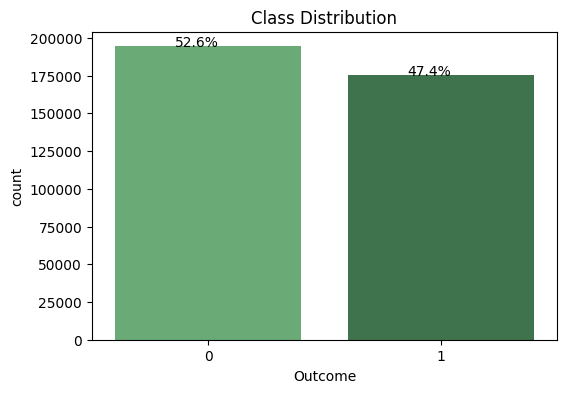

In [46]:
# Class distribution
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Outcome', data=data_bal, palette = 'Greens_d')
plt.title('Class Distribution')

# Calculate percentages and annotate
total = len(data_bal['Outcome'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

In [47]:
x_bal = data_bal.drop('Outcome', axis=1)
y_bal = data_bal['Outcome']

In [48]:
# Split the balanced data into training, validation, and testing sets
x_bal_train, x_bal_temp, y_bal_train, y_bal_temp = train_test_split(x_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)
x_bal_val, x_bal_test, y_bal_val, y_bal_test = train_test_split(x_bal_temp, y_bal_temp, test_size=0.5, stratify=y_bal_temp, random_state=42)

In [49]:
# Normalize the features
x_bal_train_sd = scaler.fit_transform(x_bal_train)
x_bal_val_sd = scaler.transform(x_bal_val)
x_bal_test_sd = scaler.transform(x_bal_test)

#### Train models on balanced dataset:

### Apply the Dimensionality Reduction Techniques - PCA, LDA, and Autoencoder on Balanced dataset

#### Apply PCA

In [50]:
pca_bal = PCA(n_components=16)

# Fit and transform with PCA
x_bal_train_pca = pca.fit_transform(x_bal_train_sd)
x_bal_val_pca = pca.transform(x_bal_val_sd)
x_bal_test_pca = pca.transform(x_bal_test_sd)


#### Apply LDA

In [51]:
lda_bal = LinearDiscriminantAnalysis(n_components=1)

# Fit and transform with LDA
x_bal_train_lda = lda.fit_transform(x_bal_train_sd, y_bal_train)
x_bal_val_lda = lda.transform(x_bal_val_sd)
x_bal_test_lda = lda.transform(x_bal_test_sd)


#### Apply Autoencoders

In [52]:
# Build and train the autoencoder
autoencoder_bal = build_custom_autoencoder(x_bal_train_sd.shape[1])
autoencoder_bal.fit(x_bal_train_sd, x_bal_train_sd, epochs=30, batch_size=256, validation_data=(x_bal_val_sd, x_bal_val_sd))

Epoch 1/30
1156/1156 [==============================] - 1s 812us/step - loss: 0.6909 - val_loss: 0.6103
Epoch 2/30
1156/1156 [==============================] - 1s 750us/step - loss: 0.6062 - val_loss: 0.6010
Epoch 3/30
1156/1156 [==============================] - 1s 758us/step - loss: 0.6018 - val_loss: 0.5990
Epoch 4/30
1156/1156 [==============================] - 1s 781us/step - loss: 0.6002 - val_loss: 0.5977
Epoch 5/30
1156/1156 [==============================] - 1s 774us/step - loss: 0.5988 - val_loss: 0.5962
Epoch 6/30
1156/1156 [==============================] - 1s 772us/step - loss: 0.5979 - val_loss: 0.5956
Epoch 7/30
1156/1156 [==============================] - 1s 748us/step - loss: 0.5973 - val_loss: 0.5951
Epoch 8/30
1156/1156 [==============================] - 1s 779us/step - loss: 0.5968 - val_loss: 0.5947
Epoch 9/30
1156/1156 [==============================] - 1s 766us/step - loss: 0.5965 - val_loss: 0.5943
Epoch 10/30
1156/1156 [==============================] - 1s 765u

In [53]:
# Define the encoder part (up to the bottleneck layer)
encoder_bal = Model(inputs=autoencoder_bal.input, outputs=autoencoder_bal.layers[1].output)

In [54]:
# Transform the data
x_bal_train_auto = encoder_bal.predict(x_bal_train_sd)
x_bal_val_auto = encoder_bal.predict(x_bal_val_sd)
x_bal_test_auto = encoder_bal.predict(x_bal_test_sd)


1156/1156 [==============================] - 1s 430us/step


# Step 3: Run models on each transformation for balanced dataset

In [55]:
### Train models on transformed datasets and store results
transformations = ['Bal_data', 'PCA_balanced', 'LDA_balanced', 'Autoencoder_balanced']
datasets = {
    'Bal_data': (x_bal_train_sd, x_bal_val_sd, x_bal_test_sd),
    'PCA_balanced': (x_bal_train_pca, x_bal_val_pca, x_bal_test_pca),
    'LDA_balanced': (x_bal_train_lda, x_bal_val_lda, x_bal_test_lda),
    'Autoencoder_balanced': (x_bal_train_auto, x_bal_val_auto, x_bal_test_auto)
}

results_bal = {}
reports_bal = {}
predictions_bal = {}

# Training and evaluating models
for transformation in transformations:
    X_train_t, X_val_t, X_test_t = datasets[transformation]

    for name, model in models.items():
        key = f"{name}_{transformation}"
        result, report, pred = train_and_evaluate(model, X_train_t, y_bal_train, X_val_t, y_bal_val, X_test_t, y_bal_test)
        results_bal[key] = result
        reports_bal[key] = report
        predictions_bal[key] = pred

### Generate and display results

In [56]:
# Generating DataFrame for results
all_results_bal_df = pd.concat(results_bal, axis=0)
all_results_bal_df

train_accuracy  train_recall  \
Logistic Regression_Bal_data             0        0.731301      0.754003   
Random Forest_Bal_data                   0        0.927936      0.946712   
MLP_Bal_data                             0        0.748818      0.785851   
XGBoost_Bal_data                         0        0.995424      0.999858   
Stacking_Bal_data                        0        0.995586      0.999501   
Logistic Regression_PCA_balanced         0        0.725015      0.746560   
Random Forest_PCA_balanced               0        0.960238      0.998241   
MLP_PCA_balanced                         0        0.742687      0.753554   
XGBoost_PCA_balanced                     0        0.995711      0.999964   
Stacking_PCA_balanced                    0        0.995596      0.999558   
Logistic Regression_LDA_balanced         0        0.730710      0.751959   
Random Forest_LDA_balanced               0        0.802561      0.849375   
MLP_LDA_balanced                         0        0.730274      0.762116   
XGBoost_LDA_balanced                     0        0.731616      0.763470   
Stacking_LDA_balanced                    0        0.993623      0.996816   
Logistic Regression_Autoencoder_balanced 0        0.727364      0.741239   
Random Forest_Autoencoder_balanced       0        0.976032      0.999509   
MLP_Autoencoder_balanced                 0        0.737986      0.758241   
XGBoost_Autoencoder_balanced             0        0.995718      0.999957   
Stacking_Autoencoder_balanced            0        0.995846      0.999501   

                                            train_precision  val_accuracy  \
Logistic Regression_Bal_data             0         0.701836      0.732034   
Random Forest_Bal_data                   0         0.905676      0.880955   
MLP_Bal_data                             0         0.713692      0.742416   
XGBoost_Bal_data                         0         0.990586      0.936679   
Stacking_Bal_data                        0         0.991268      0.984805   
Logistic Regression_PCA_balanced         0         0.695969      0.727627   
Random Forest_PCA_balanced               0         0.924053      0.905694   
MLP_PCA_balanced                         0         0.718058      0.739469   
XGBoost_PCA_balanced                     0         0.991076      0.948224   
Stacking_PCA_balanced                    0         0.991234      0.986184   
Logistic Regression_LDA_balanced         0         0.701790      0.732142   
Random Forest_LDA_balanced               0         0.761852      0.779565   
MLP_LDA_balanced                         0         0.697448      0.731412   
XGBoost_LDA_balanced                     0         0.698764      0.732331   
Stacking_LDA_balanced                    0         0.989815      0.907641   
Logistic Regression_Autoencoder_balanced 0         0.701201      0.730520   
Random Forest_Autoencoder_balanced       0         0.952335      0.923052   
MLP_Autoencoder_balanced                 0         0.709488      0.738306   
XGBoost_Autoencoder_balanced             0         0.991097      0.951171   
Stacking_Autoencoder_balanced            0         0.991808      0.986752   

                                            val_recall  val_precision  \
Logistic Regression_Bal_data             0    0.756212       0.702005   
Random Forest_Bal_data                   0    0.937372       0.832734   
MLP_Bal_data                             0    0.781058       0.706823   
XGBoost_Bal_data                         0    0.997778       0.883757   
Stacking_Bal_data                        0    0.994871       0.973675   
Logistic Regression_PCA_balanced         0    0.751482       0.697725   
Random Forest_PCA_balanced               0    0.993390       0.837916   
MLP_PCA_balanced                         0    0.751710       0.714185   
XGBoost_PCA_balanced                     0    0.998404       0.902767   
Stacking_PCA_balanced                    0    0.995213       0.976133   
Logistic Regression_LDA_ba

Upon quintupling the minority class in the BRFSS dataset to balance it, the models showed marked improvements in their predictive abilities. The Stacking Classifier (SC) with and without dimensionality reduction techniques (PCA, LDA, and Autoencoder) consistently achieved high training accuracies and AUC scores above 0.98, indicating excellent predictive performance. The Random Forest model also displayed notable improvement, especially when combined with PCA, suggesting that dimensionality reduction techniques can significantly enhance model performance on large, balanced datasets.

In [57]:
# Print classification reports
for key, report in reports_bal.items():
    print(f"Classification Report for {key}:\n{report}\n")
    print("-" * 50)  # Print dashes for separation

Classification Report for Logistic Regression_Bal_data:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74     19438
           1       0.70      0.76      0.73     17549

    accuracy                           0.73     36987
   macro avg       0.74      0.74      0.73     36987
weighted avg       0.74      0.73      0.73     36987


--------------------------------------------------
Classification Report for Random Forest_Bal_data:
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     19438
           1       0.83      0.94      0.88     17549

    accuracy                           0.88     36987
   macro avg       0.88      0.88      0.88     36987
weighted avg       0.89      0.88      0.88     36987


--------------------------------------------------
Classification Report for MLP_Bal_data:
              precision    recall  f1-score   support

           0       0.79      0.71      0.

### Confusion Matrices

Confusion matrix illustrates a thorough breakdown of the model’s prediction distribution across actual classes, revealing instances of correct and incorrect classifications.

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(predictions, y_test, nrows, ncols, title, filename):
    num_models = len(predictions)
    if nrows * ncols < num_models:
        raise ValueError("Number of subplots is less than the number of models")

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 30))  # Adjust the figsize as needed
    fig.suptitle(title, fontsize=20)

    model_names = list(predictions.keys())
    for idx, model_name in enumerate(model_names):
        ax = axes[idx // ncols, idx % ncols]
        cm = confusion_matrix(y_test, predictions[model_name]['y_pred_test'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', ax=ax)
        ax.set_title(model_name, fontsize=10)
        ax.set_xlabel('Predicted', fontsize=8)
        ax.set_ylabel('True', fontsize=8)

    # If there are any empty subplots, hide them
    for i in range(num_models, nrows * ncols):
        axes.flatten()[i].set_visible(False)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

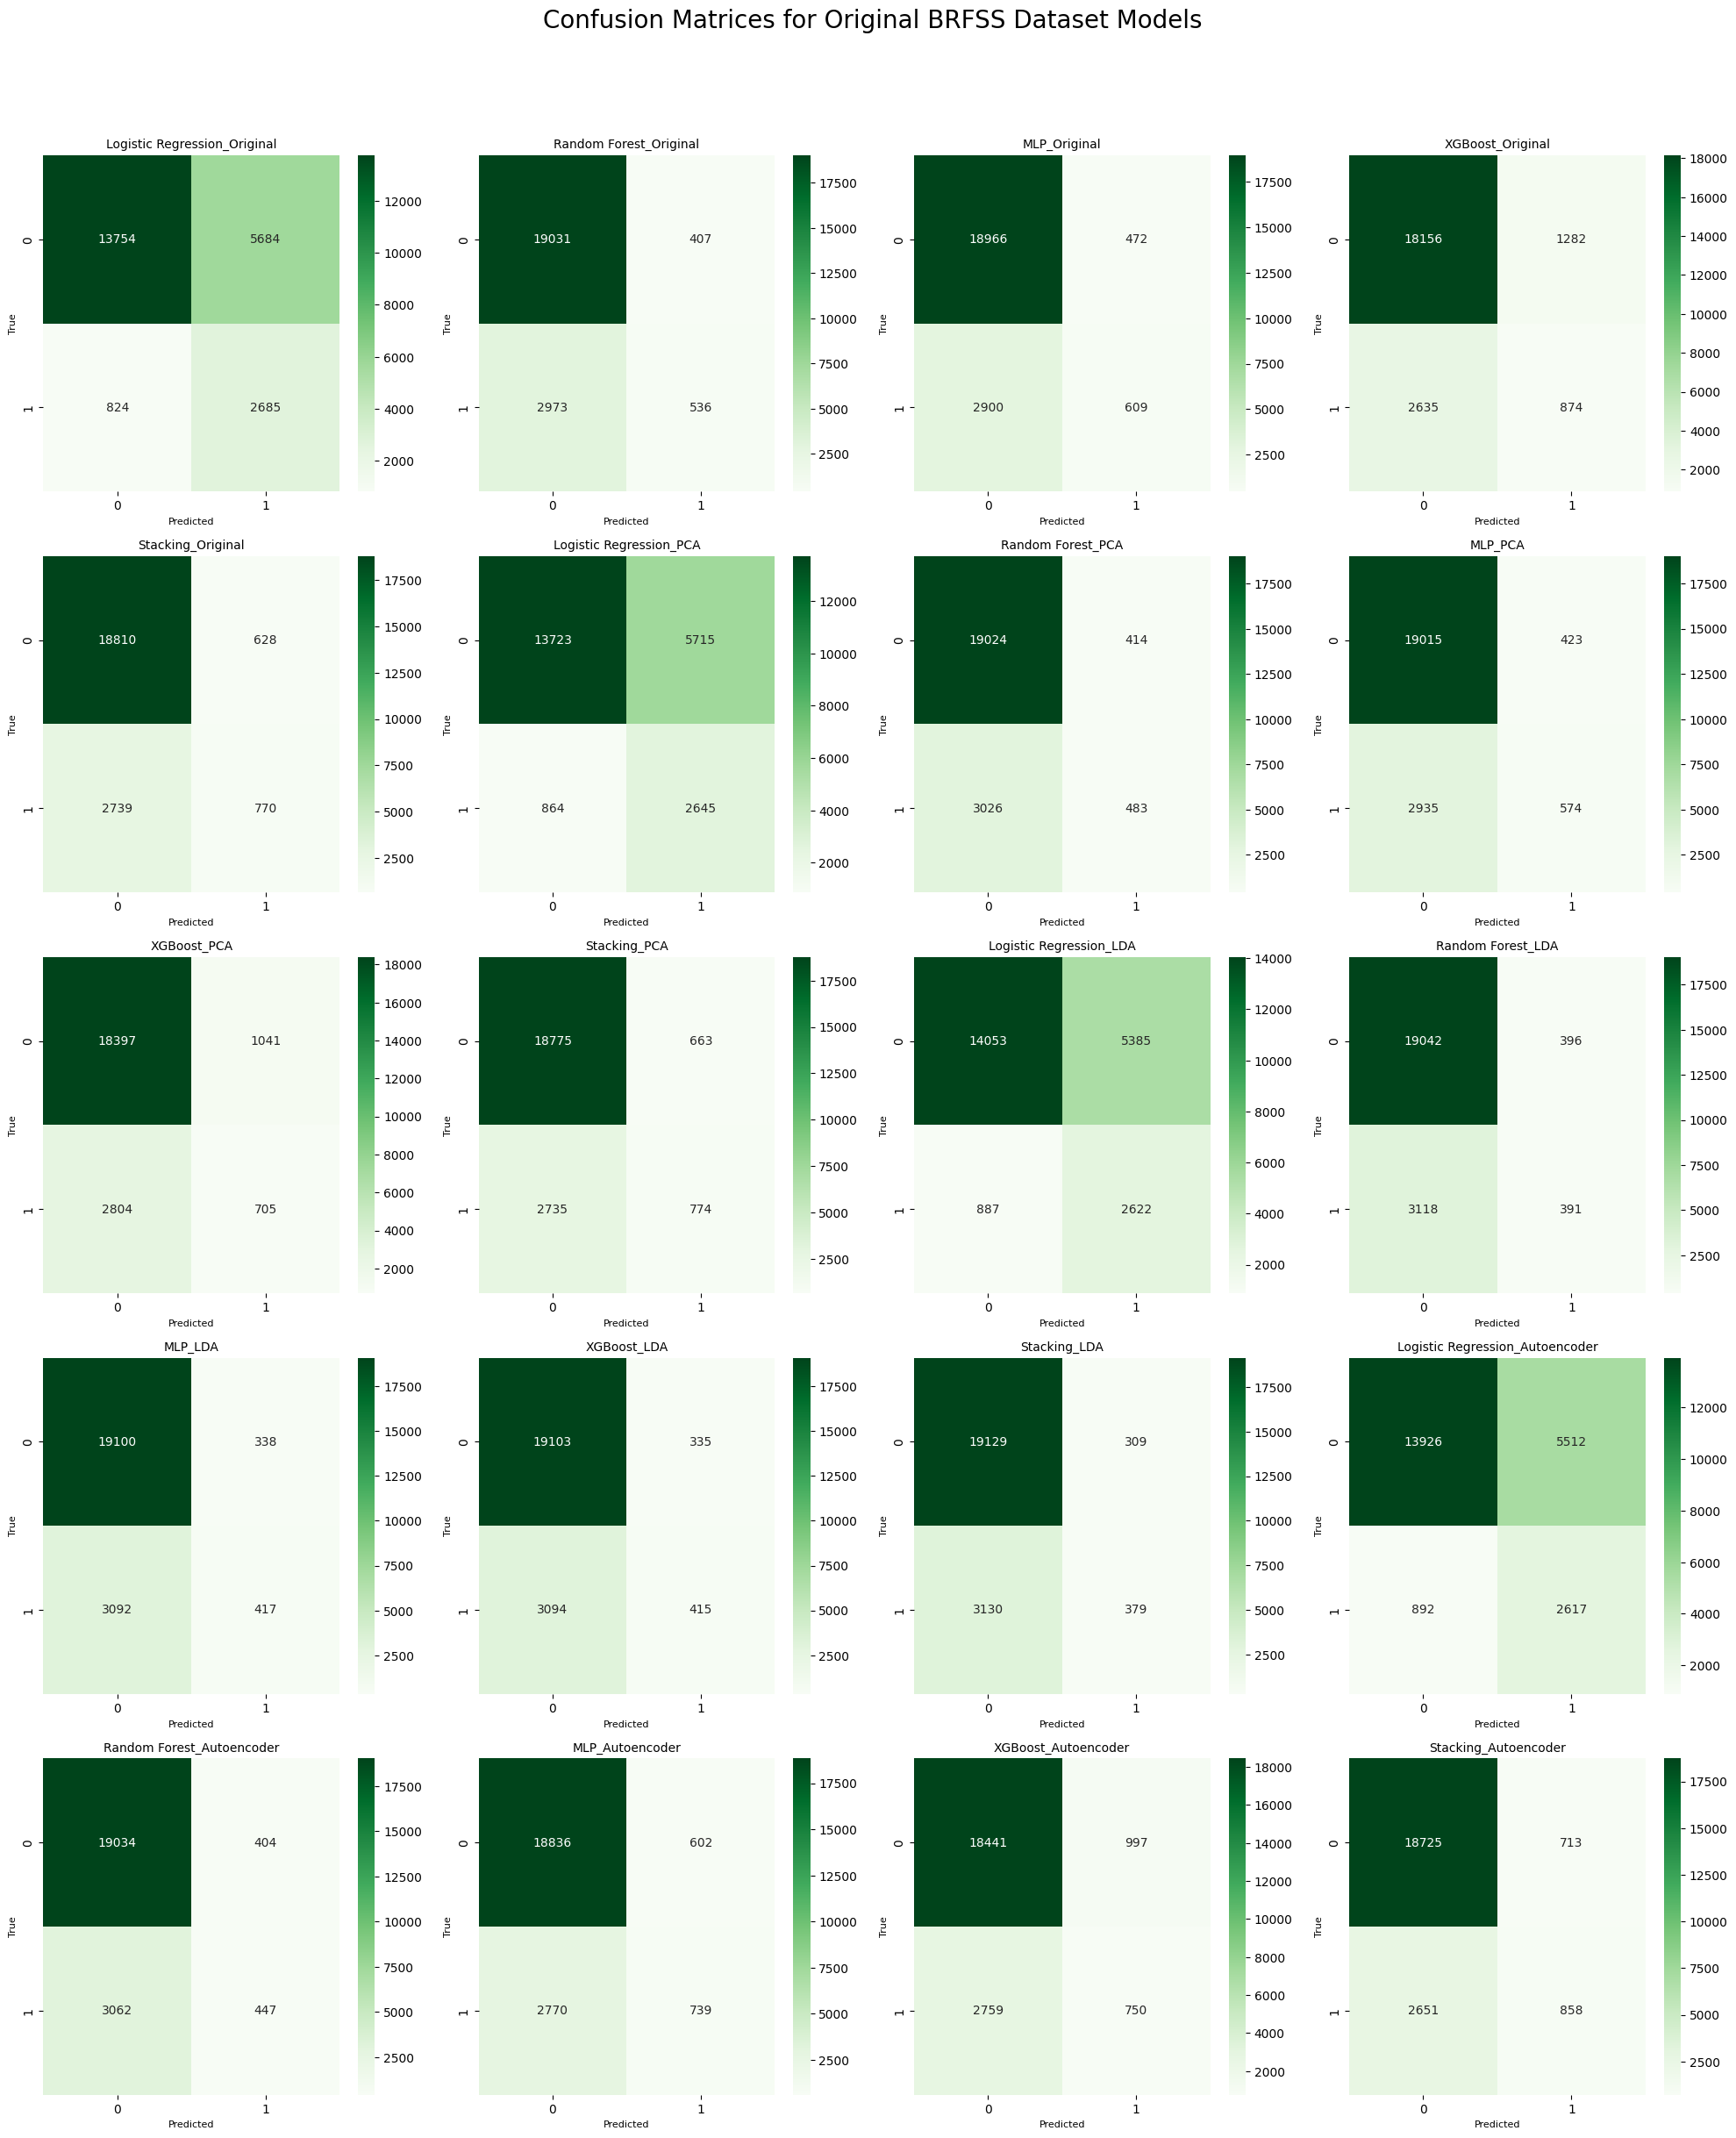

In [59]:
### Confusion Matices for Original Dataset
nrows, ncols = 6, 4
plot_confusion_matrices(predictions, y_test, nrows, ncols, "Confusion Matrices for Original BRFSS Dataset Models", "confusion_matrices_original_brfss_models.png")


For the original BRFSS dataset, the confusion matrices display a significant imbalance in class prediction, with a high number of true negatives and relatively few true positives. This skew is indicative of models predominantly predicting the majority class. Despite the large dataset size, the models struggle to accurately identify positive instances, which is a common issue in imbalanced datasets. There's a notable number of false negatives across models, which could have serious implications for health-related predictions.

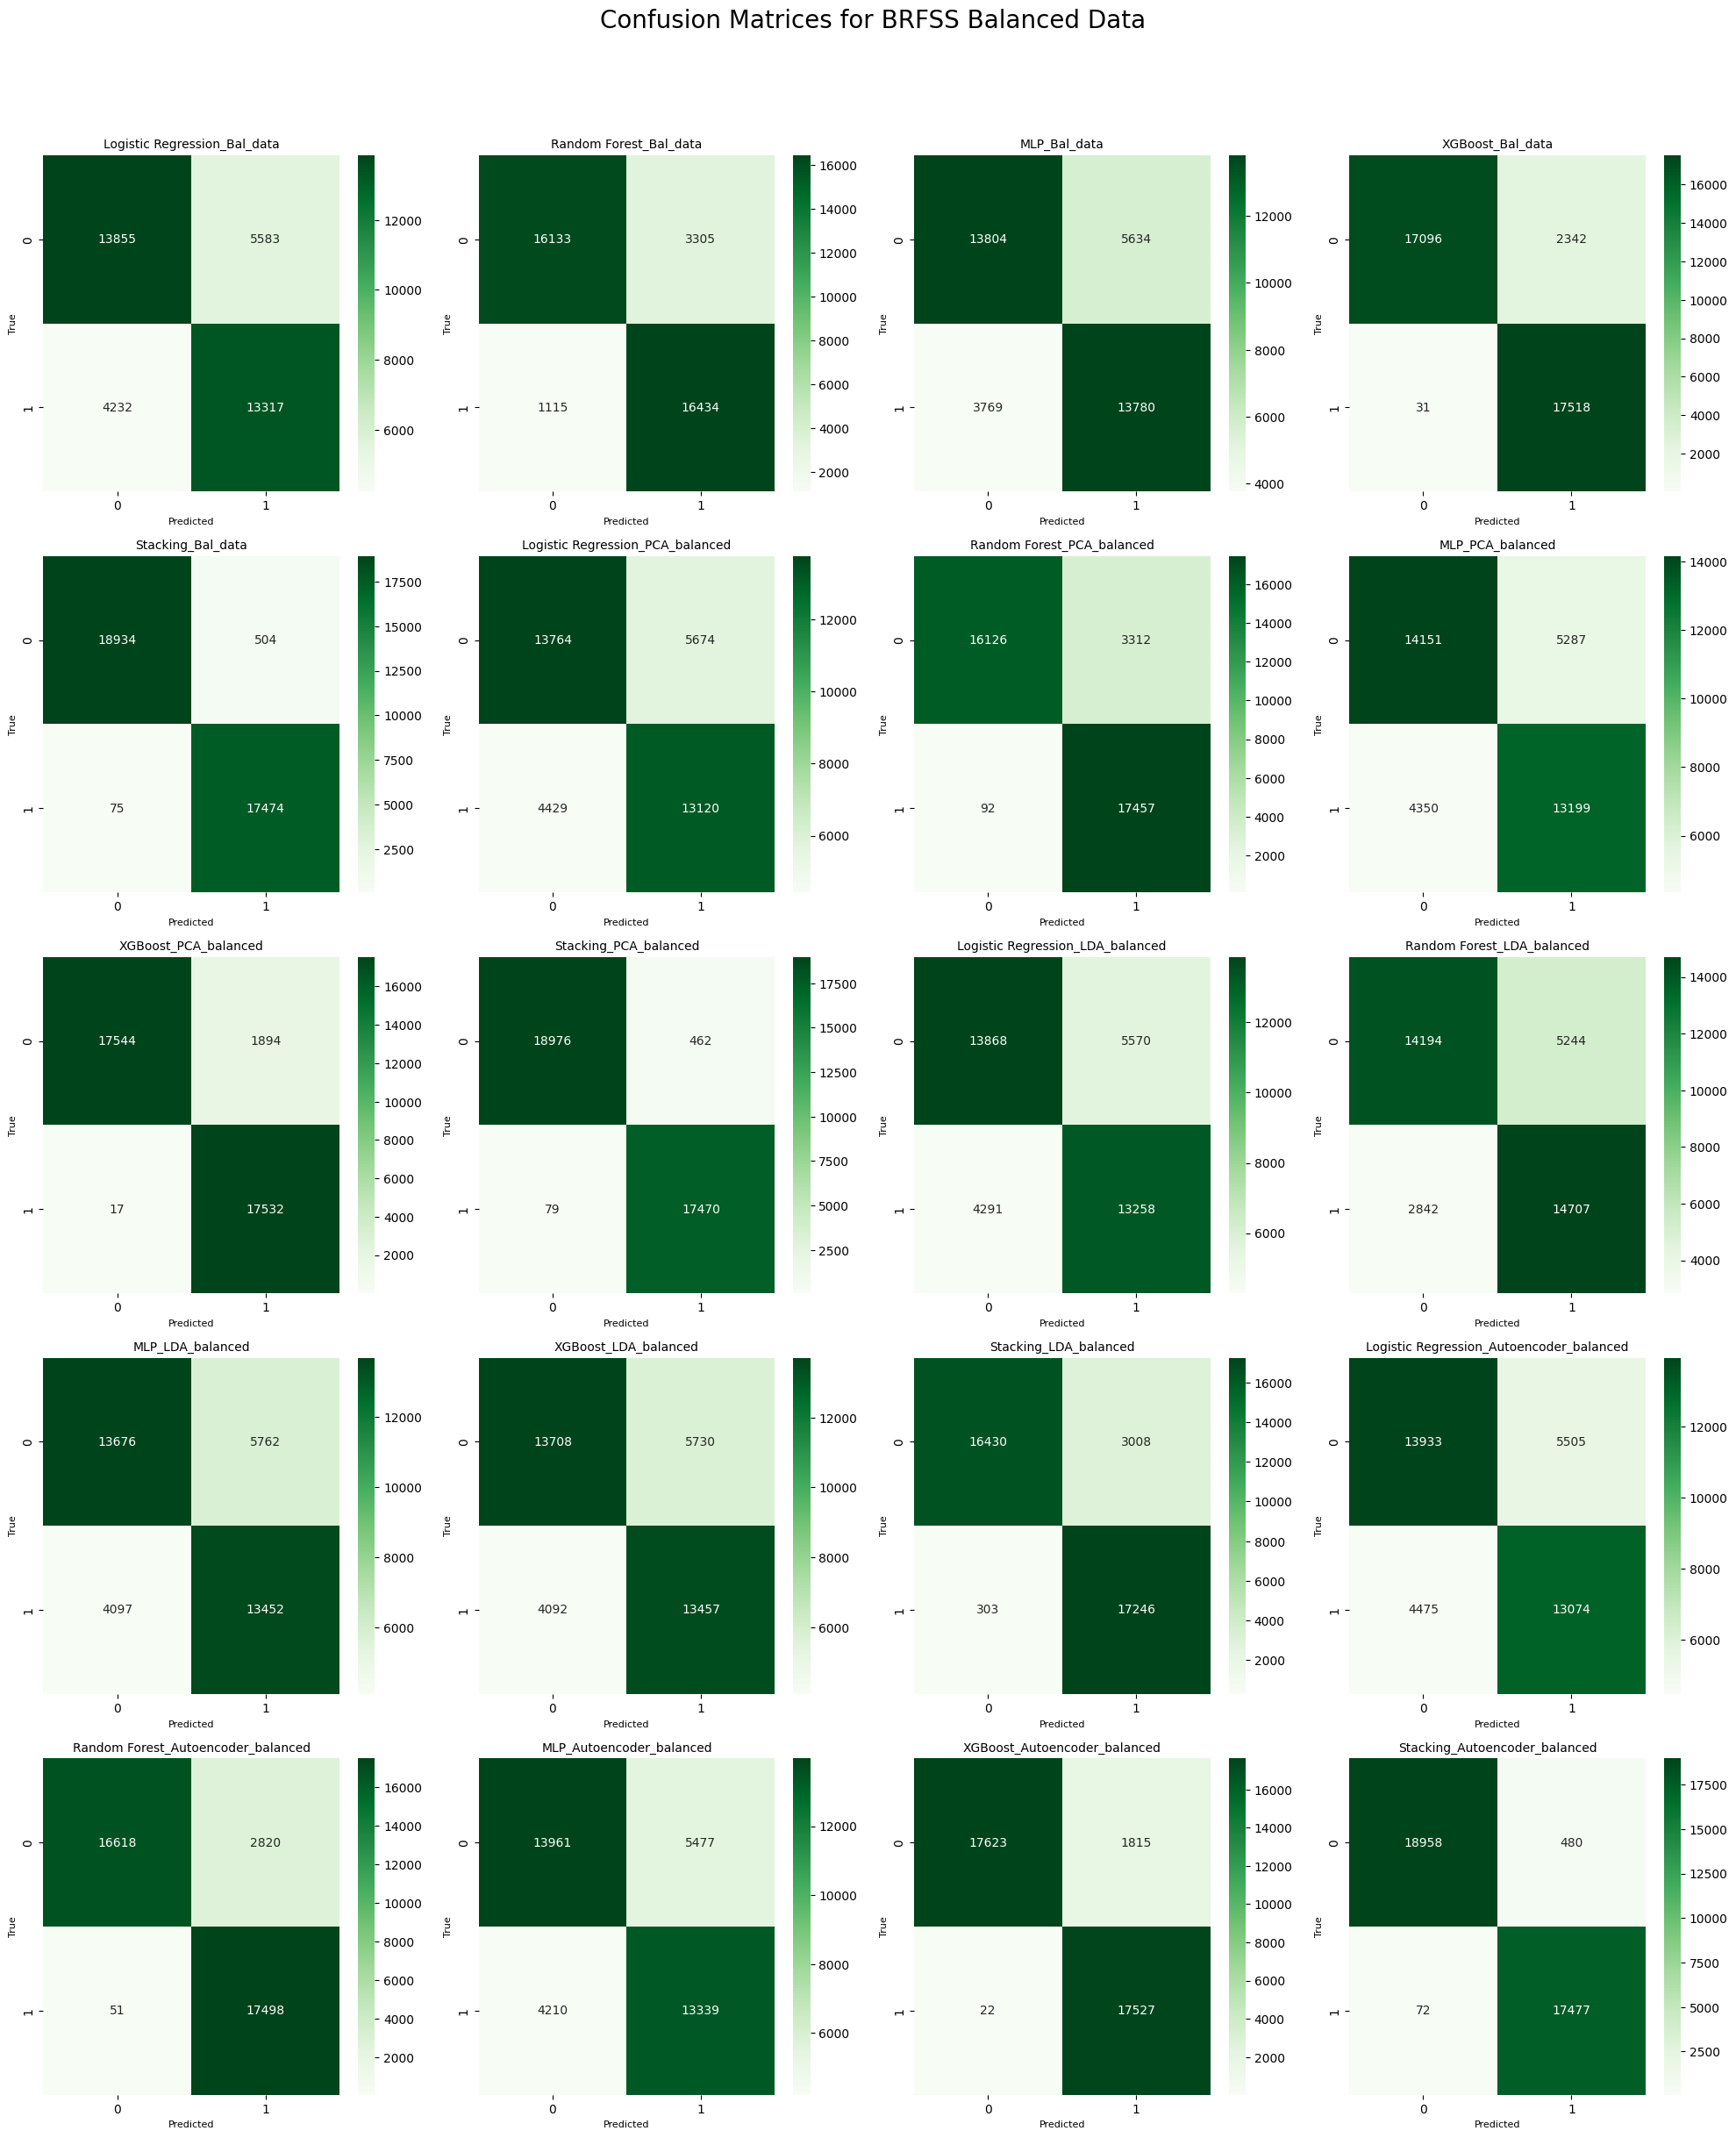

In [60]:
### Confusion Matices for Balanced Dataset
nrows_balanced, ncols_balanced = 6, 4
# Plot and save confusion matrices for balanced dataset
plot_confusion_matrices(predictions_bal, y_bal_test, nrows_balanced, ncols_balanced, "Confusion Matrices for BRFSS Balanced Data", "confusion_matrices_brfss_balanced.png")


The confusion matrices on the balanced data illustrate even stronger performance, particularly in models such as Random Forest and Stacking Classifier, which show a high number of true positives with relatively fewer false positives and negatives. This indicates that these models are effectively identifying the correct classes and are less confused by the previously underrepresented class after the dataset was balanced

### ROC Curves

Receiver Operating Characteristic curves (ROC Curves), are graphical representations used to evaluate the diagnostic ability of a binary classifier system as its discrimination threshold is varied. They are created by plotting the true positive rate (TPR), also known as sensitivity, against the false positive rate (FPR).

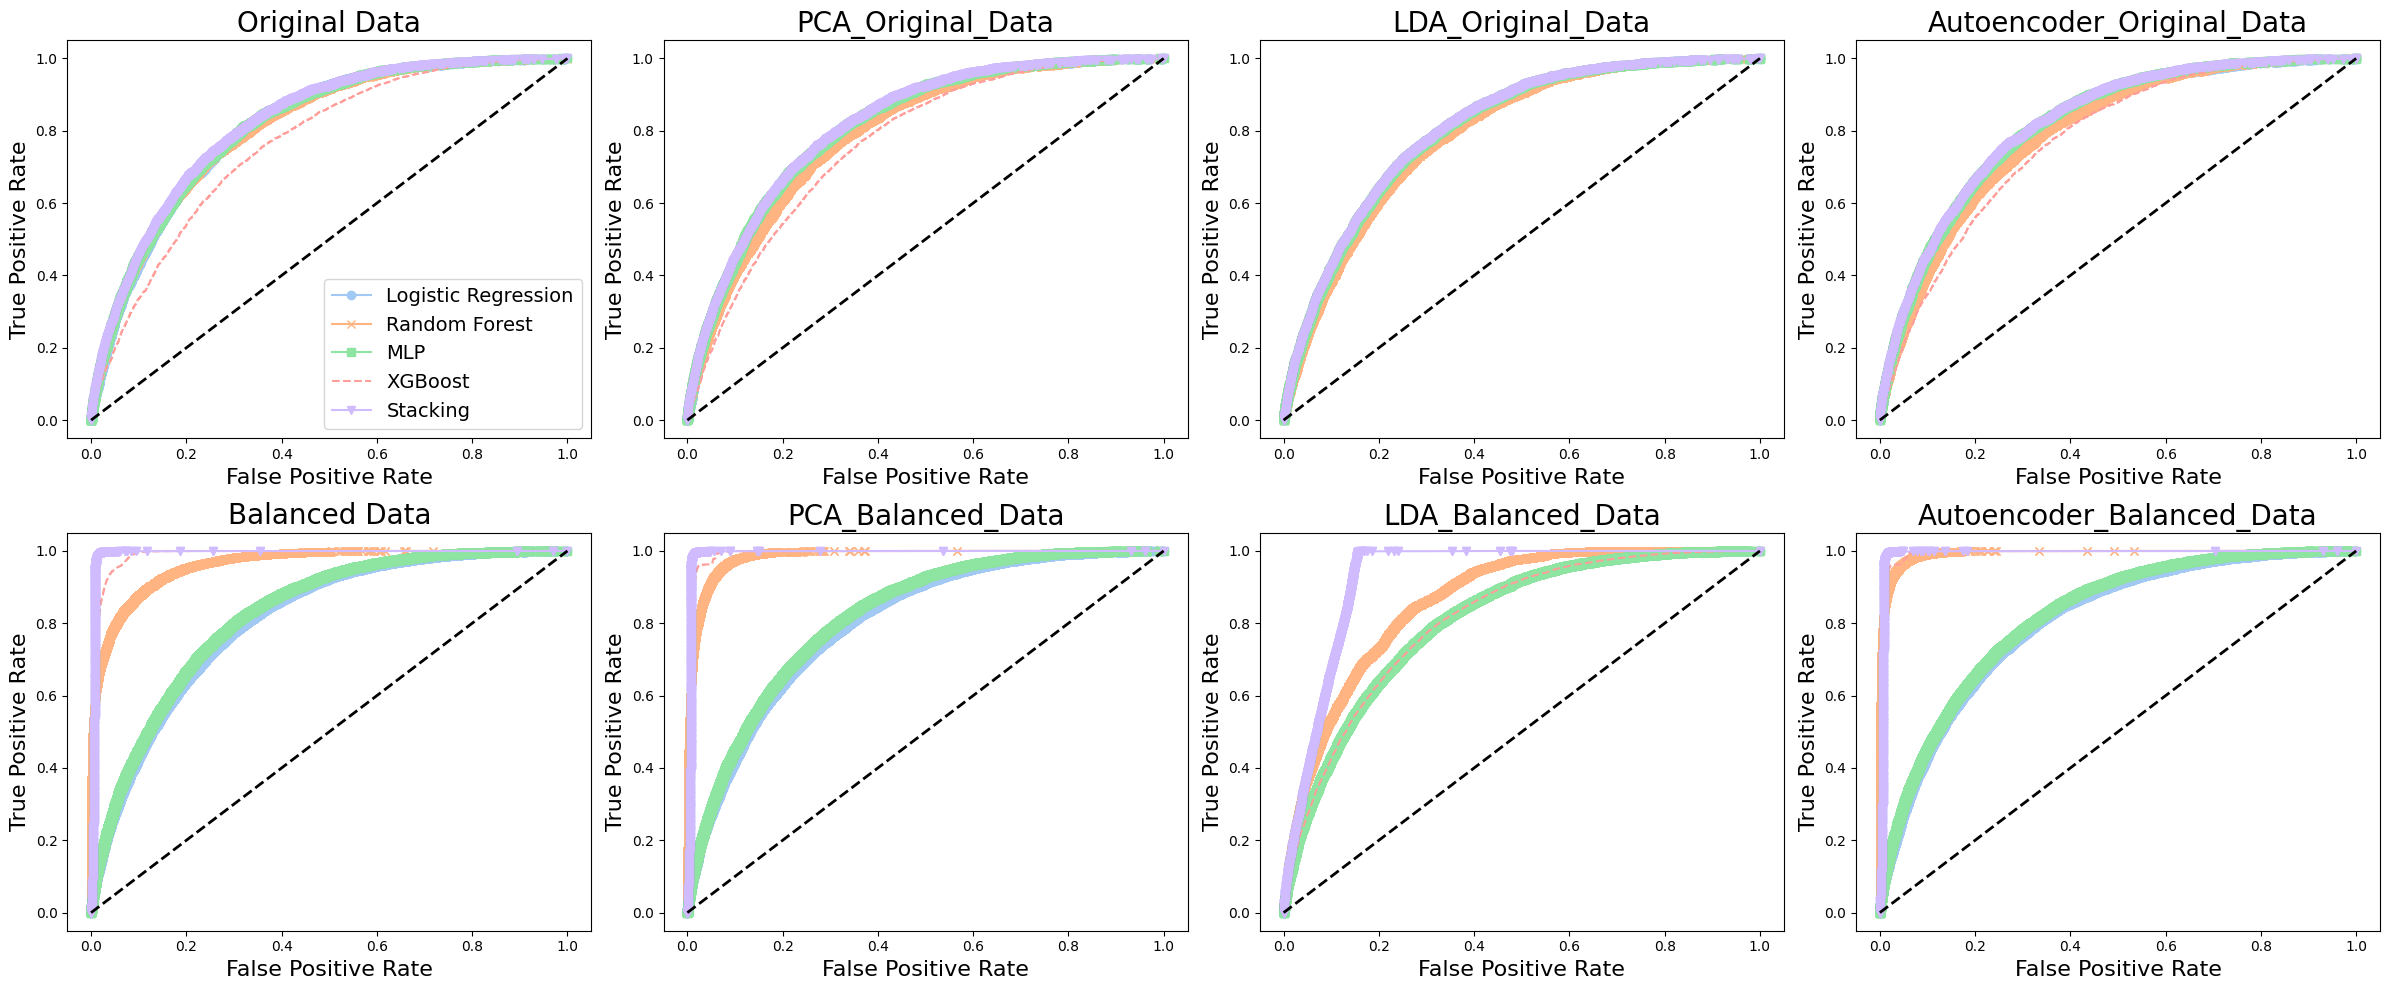

In [61]:
# Filter predictions for original and transformed datasets
original_predictions = {k: v for k, v in predictions.items() if 'Original' in k}
pca_predictions = {k: v for k, v in predictions.items() if 'PCA' in k}
lda_predictions = {k: v for k, v in predictions.items() if 'LDA' in k}
autoencoder_predictions = {k: v for k, v in predictions.items() if 'Autoencoder' in k}

# Filter predictions for balanced and transformed datasets
balanced_original_predictions = {k: v for k, v in predictions_bal.items() if 'Bal_data' in k}
balanced_pca_predictions = {k: v for k, v in predictions_bal.items() if 'PCA_balanced' in k}
balanced_lda_predictions = {k: v for k, v in predictions_bal.items() if 'LDA_balanced' in k}
balanced_autoencoder_predictions = {k: v for k, v in predictions_bal.items() if 'Autoencoder_balanced' in k}

# Prepare the data for plotting
predictions_dict_list = [
    original_predictions, pca_predictions, lda_predictions, autoencoder_predictions,
    balanced_original_predictions, balanced_pca_predictions, balanced_lda_predictions, balanced_autoencoder_predictions
]
y_true_list = [y_test] * 4 + [y_bal_test] * 4
titles = [
    "Original Data", "PCA_Original_Data", "LDA_Original_Data", "Autoencoder_Original_Data",
    "Balanced Data", "PCA_Balanced_Data", "LDA_Balanced_Data", "Autoencoder_Balanced_Data"
]
 # Different markers for each model
markers = ['o-', 'x-', 's-', '--', 'v-', '^-', '<-', '>-'] 

# Define the plotting function
def plot_combined_roc_curves_subplots(predictions_dict_list, y_true_list, titles, nrows, ncols, filename, markers):
    num_plots = len(predictions_dict_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))

    for i in range(num_plots):
        ax = axes.flatten()[i] if nrows * ncols > 1 else axes
        ax.set_title(titles[i], fontsize=20)
        ax.set_xlabel('False Positive Rate', fontsize=16)
        ax.set_ylabel('True Positive Rate', fontsize=16)

        for (model_name, pred), marker in zip(predictions_dict_list[i].items(), markers):
            if 'y_pred_proba_test' in pred:
                fpr, tpr, _ = roc_curve(y_true_list[i], pred['y_pred_proba_test'])
                #roc_auc = auc(fpr, tpr)
                ax.plot(fpr, tpr, marker, label=f'{model_name.split("_")[0]}')

        ax.plot([0, 1], [0, 1], 'k--', lw = 2)  # Reference line
        if i == 0:
            ax.legend(loc='lower right', fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Plot and save ROC curves for original and balanced datasets
plot_combined_roc_curves_subplots(
    predictions_dict_list, y_true_list, titles, 
    nrows=2, ncols=4, filename="brfss_roc_curves_combined_subplot.png", markers=markers
)


the ROC curves show that the original, imbalanced dataset already yielded reasonably high AUC values, suggesting that the models had a decent predictive ability. The effect of balancing the data on the AUC values was mixed, with some models showing a slight improvement and others remaining stable or showing a slight decrease. The most notable improvements were observed in models like Logistic Regression and XGBoost when the data was balanced, which achieved AUC values closer to 1.0, indicating a very high true positive rate and a low false positive rate.

### Precision - Recall Curves

Precision-Recall (PR) curves, plot the precision of a classifier against its recall (true positive rate) at different thresholds.PR curves give a more informative picture of an algorithm’s performance when the classes are very imbalanced.

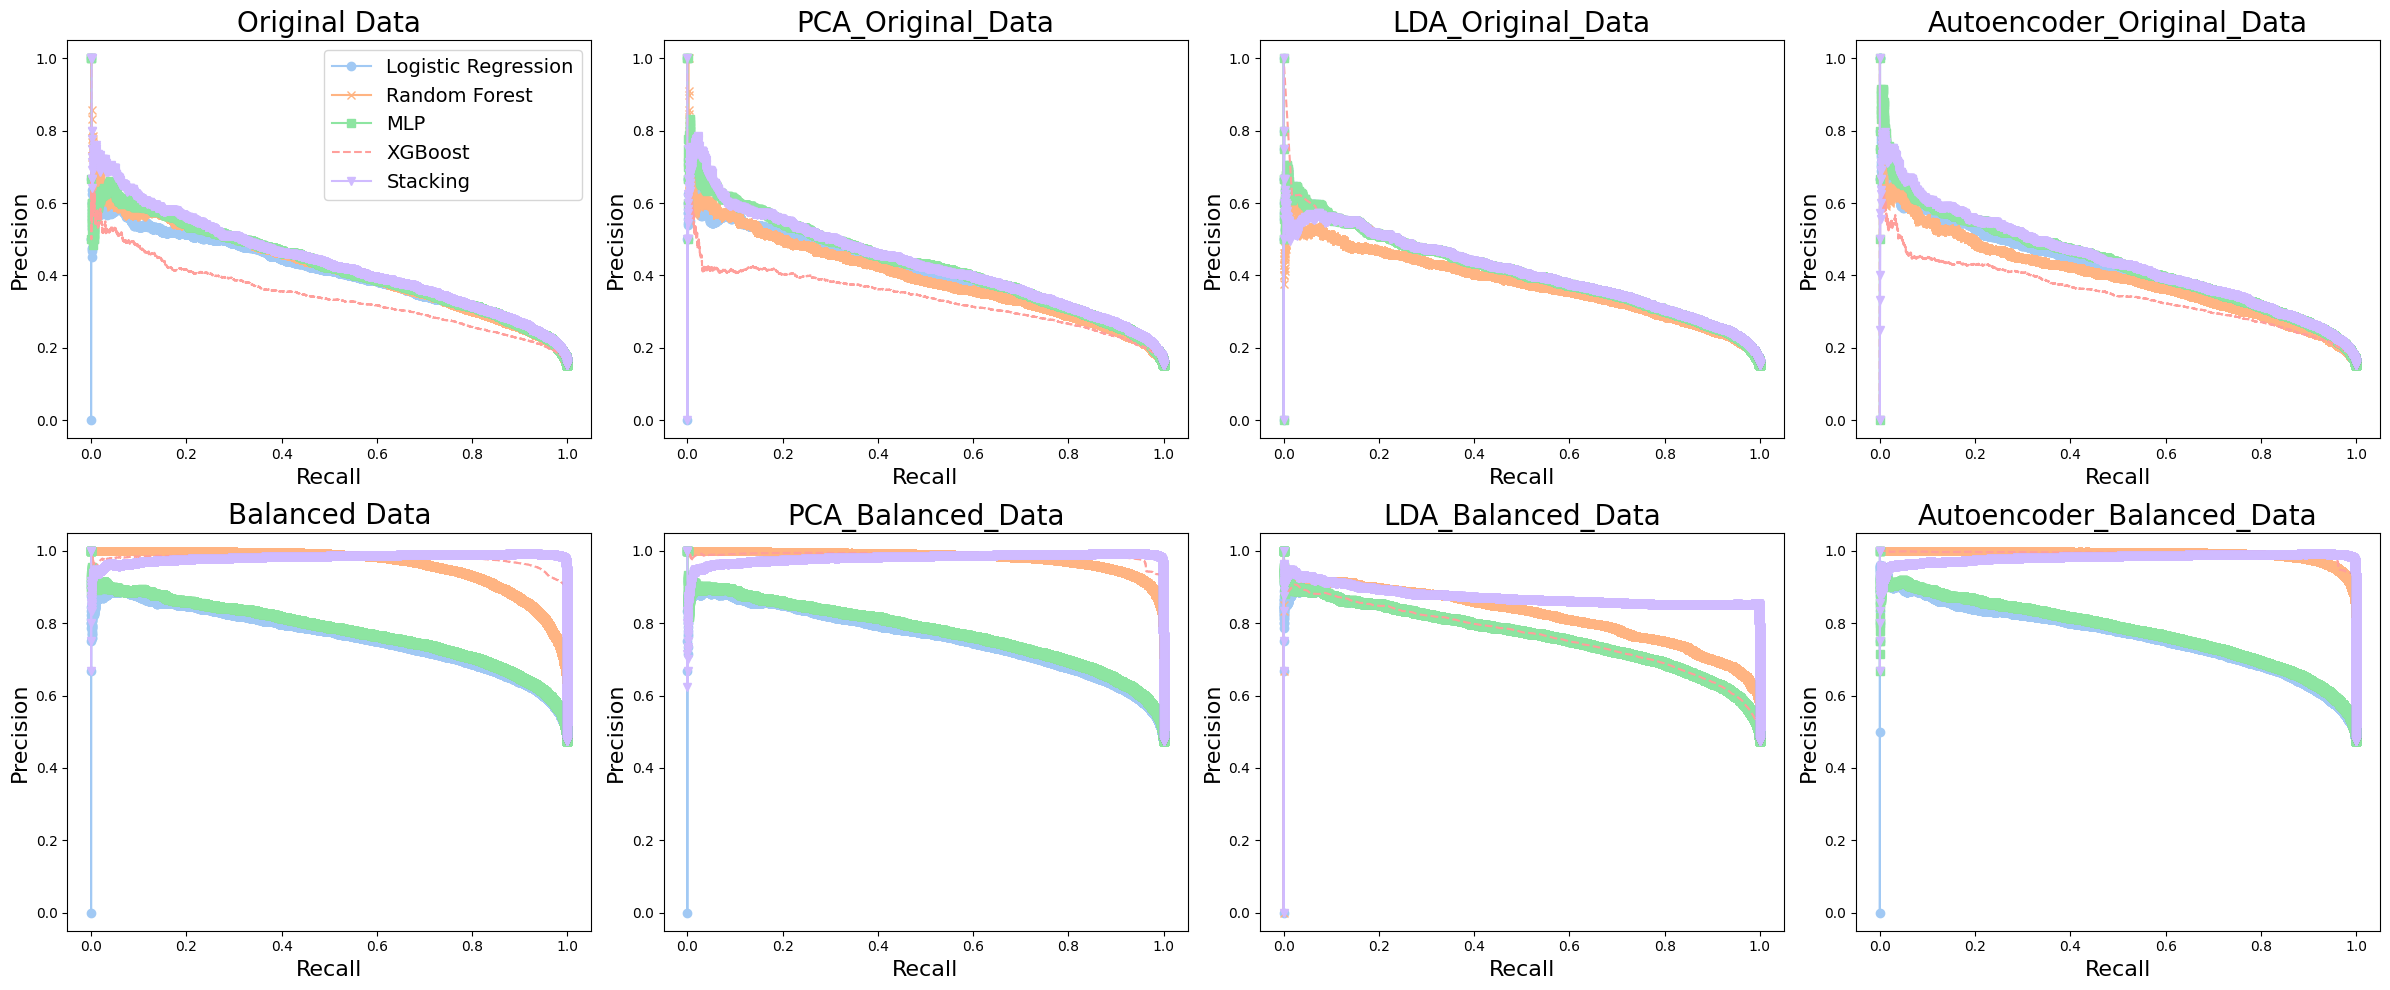

In [62]:
def plot_combined_precision_recall_curves_subplots(predictions_dict_list, y_true_list, titles, nrows, ncols, filename, markers, line_width=2):
    num_plots = len(predictions_dict_list)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 5))

    for i in range(num_plots):
        ax = axes.flatten()[i] if nrows * ncols > 1 else axes
        ax.set_title(titles[i],  fontsize=20)
        ax.set_xlabel('Recall', fontsize=16)
        ax.set_ylabel('Precision', fontsize=16)

        for (model_name, pred), marker in zip(predictions_dict_list[i].items(), markers):
            if 'y_pred_proba_test' in pred:
                precision, recall, _ = precision_recall_curve(y_true_list[i], pred['y_pred_proba_test'])
                # pr_auc = auc(recall, precision)
                ax.plot(recall, precision, marker, label=f'{model_name.split("_")[0]}')
                
        # Add legend to first plot only
        if i ==0:
            ax.legend(loc='best', fontsize=14)

    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.show()

# Prepare the titles for Precision-Recall curves
titles = [
    "Original Data", "PCA_Original_Data", "LDA_Original_Data", "Autoencoder_Original_Data",
    "Balanced Data", "PCA_Balanced_Data", "LDA_Balanced_Data", "Autoencoder_Balanced_Data"
]

# Plot and save Precision-Recall curves for original and balanced datasets
plot_combined_precision_recall_curves_subplots(
    predictions_dict_list, y_true_list, titles, 
    nrows=2, ncols=4, filename="brfss_precision_recall_curves_combined_subplot.png", markers=markers
)


 The models perform better on the balanced data. The Stacking Classifier and Random Forest models show impressive performance with high precision across all recall levels, demonstrating their effectiveness in classifying balanced data

### Learning Curves

Learning curves are a graphical representation of the change in learning performance over time, usually visualized by plotting the training and validation metrics as a function of the number of training instances or epochs. They are helpful for diagnosing the behavior of machine learning models as they learn from increasing amounts of data.

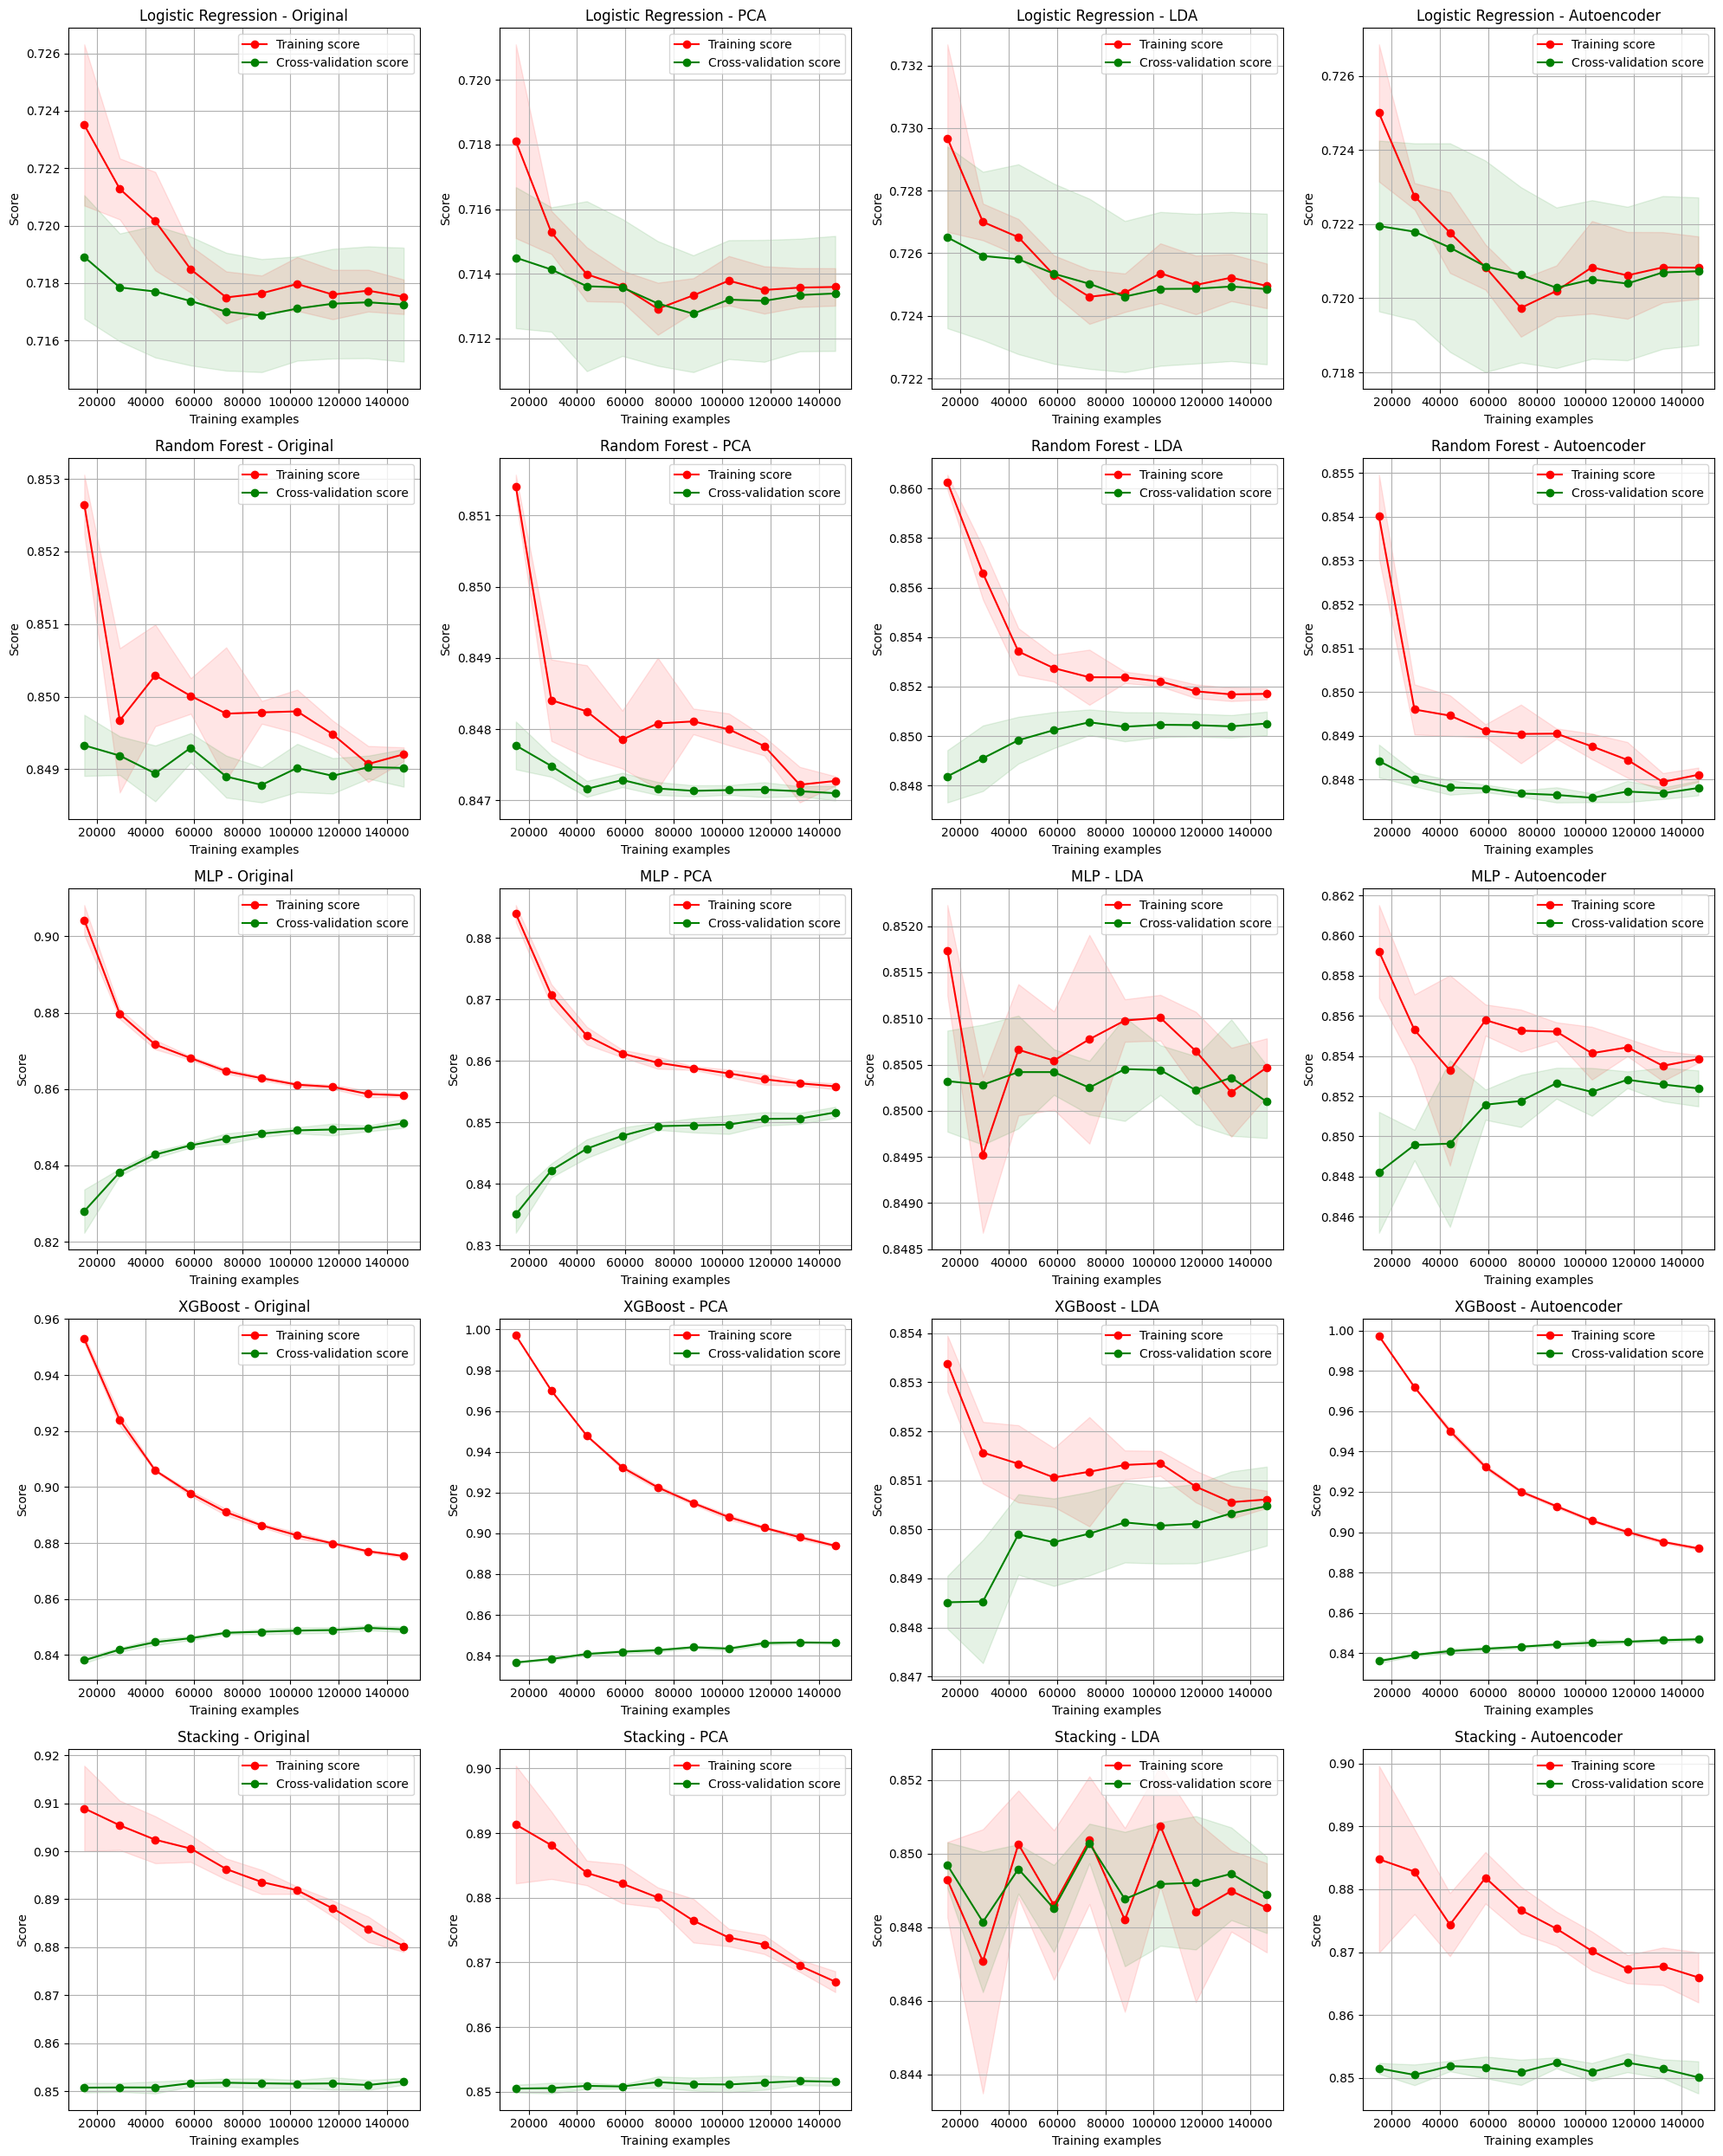

In [64]:
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=0, class_weight='balanced', solver="liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=0, max_depth=6),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss'),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier())])
}
 
def plot_learning_curve(model, X, y, title, ax):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
 
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
 
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
 
    ax.set_title(title)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.legend(loc="best")
 
 
# Assign datasets for original transformations
original_datasets = {
    'Original': (x_train_sd, y_train),
    'PCA': (X_train_pca, y_train),
    'LDA': (X_train_lda, y_train),
    'Autoencoder': (X_train_auto_imbal, y_train)
}
 
# Prepare the layout for the subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot learning curves for original datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in original_datasets.items():
        title = f"{model_name} - {transformation_name}"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index])
        ax_index += 1
        
 
plt.tight_layout()
plt.savefig('original_datasets_learning_curves.png', dpi=300)
plt.show()

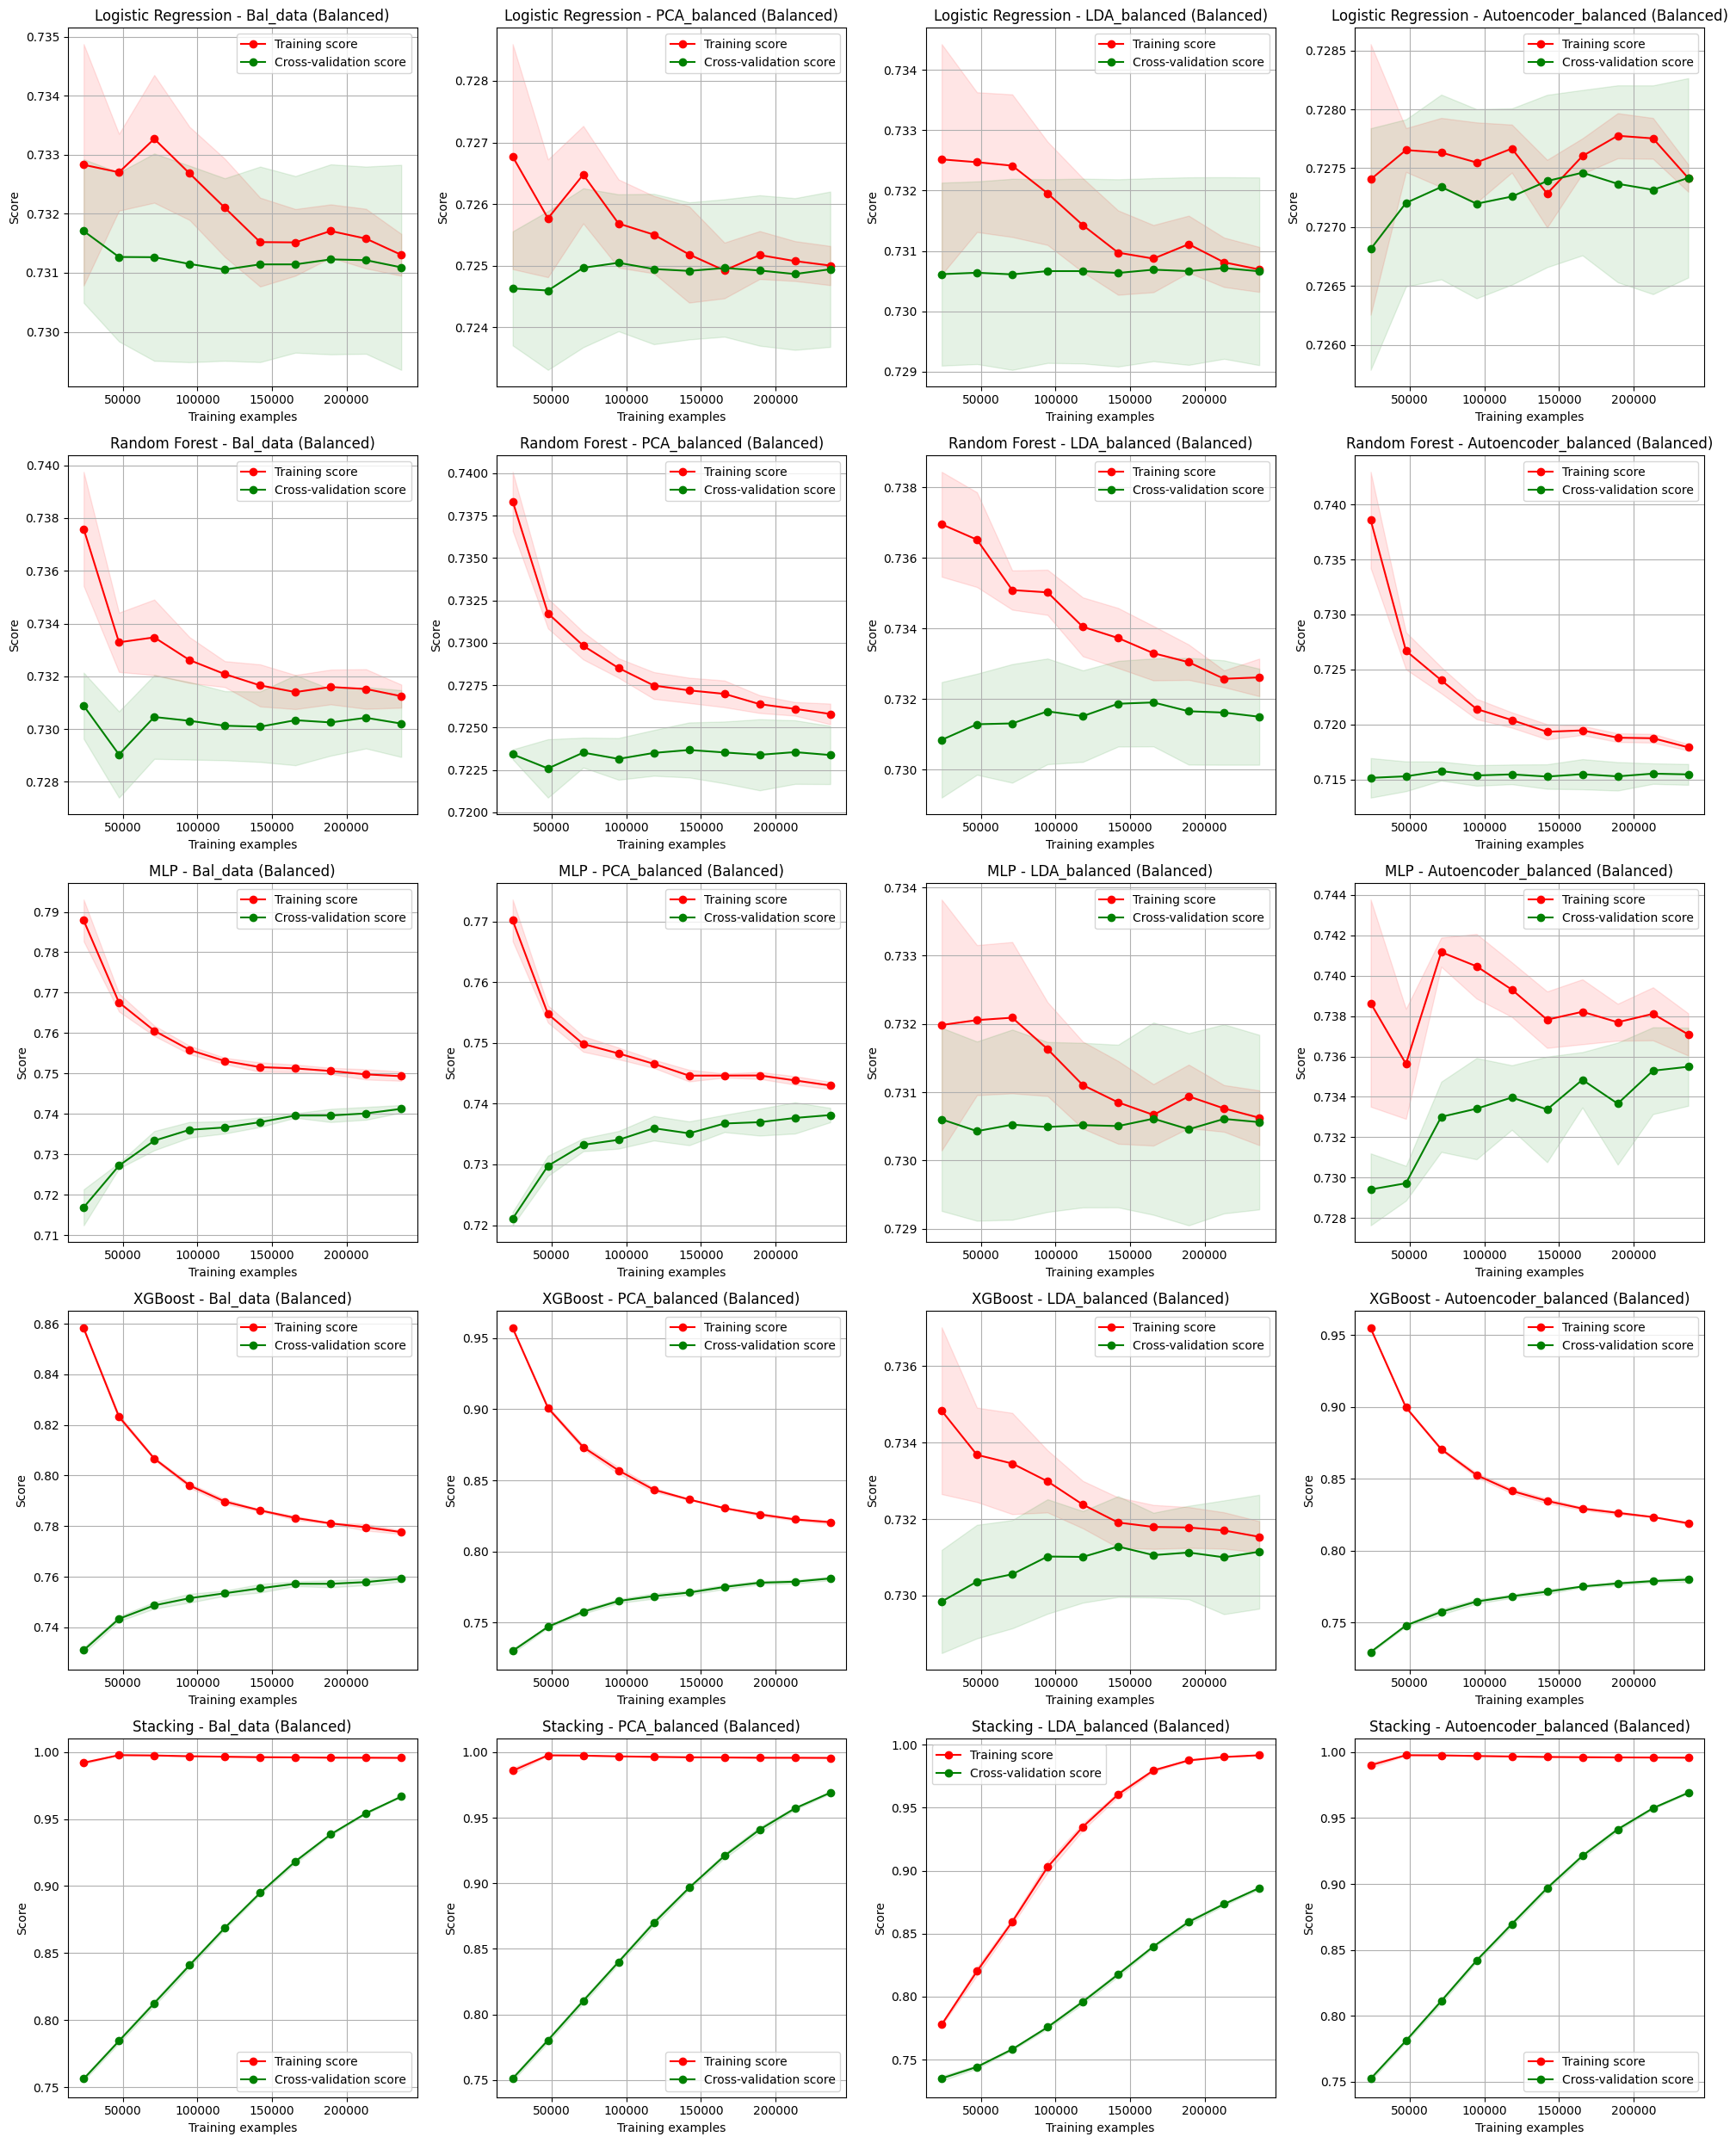

In [65]:
# Assign datasets for balanced transformations
balanced_datasets = {
    'Bal_data': (x_bal_train_sd, y_bal_train),
    'PCA_balanced': (x_bal_train_pca, y_bal_train),
    'LDA_balanced': (x_bal_train_lda, y_bal_train),
    'Autoencoder_balanced': (x_bal_train_auto, y_bal_train)
}
 
 
# Prepare the layout for the subplots for balanced datasets
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot learning curves for balanced datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in balanced_datasets.items():
        title = f"{model_name} - {transformation_name} (Balanced)"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index])
        ax_index += 1
 
plt.tight_layout()
plt.savefig('balanced_datasets_learning_curves.png', dpi=300)
plt.show()

Original Data: The model on the original, larger dataset starts with overfitting, as seen with the substantial gap between training and validation scores.

Balanced Data: Balancing the dataset shows significant improvement, with the validation score catching up with the training score, which suggests better model generalization at scale.

PCA Balanced: The application of PCA on balanced data shows a consistent increase in validation scores as more data is used, implying successful dimensionality reduction and improved model learning.

Autoencoder Balanced: Similar to PCA, the autoencoder approach on balanced data results in high training and validation scores, indicating that the model learns complex representations without losing generalization capability. And the more the data the better the generalization

### Log- Loss Curves

It measures the uncertainty of the probabilities of your model by comparing them with the actual labels. A model that predicts with 100% certainty (and correctly) will have a log loss of 0, but if the model is uncertain or incorrect, the log loss increases.

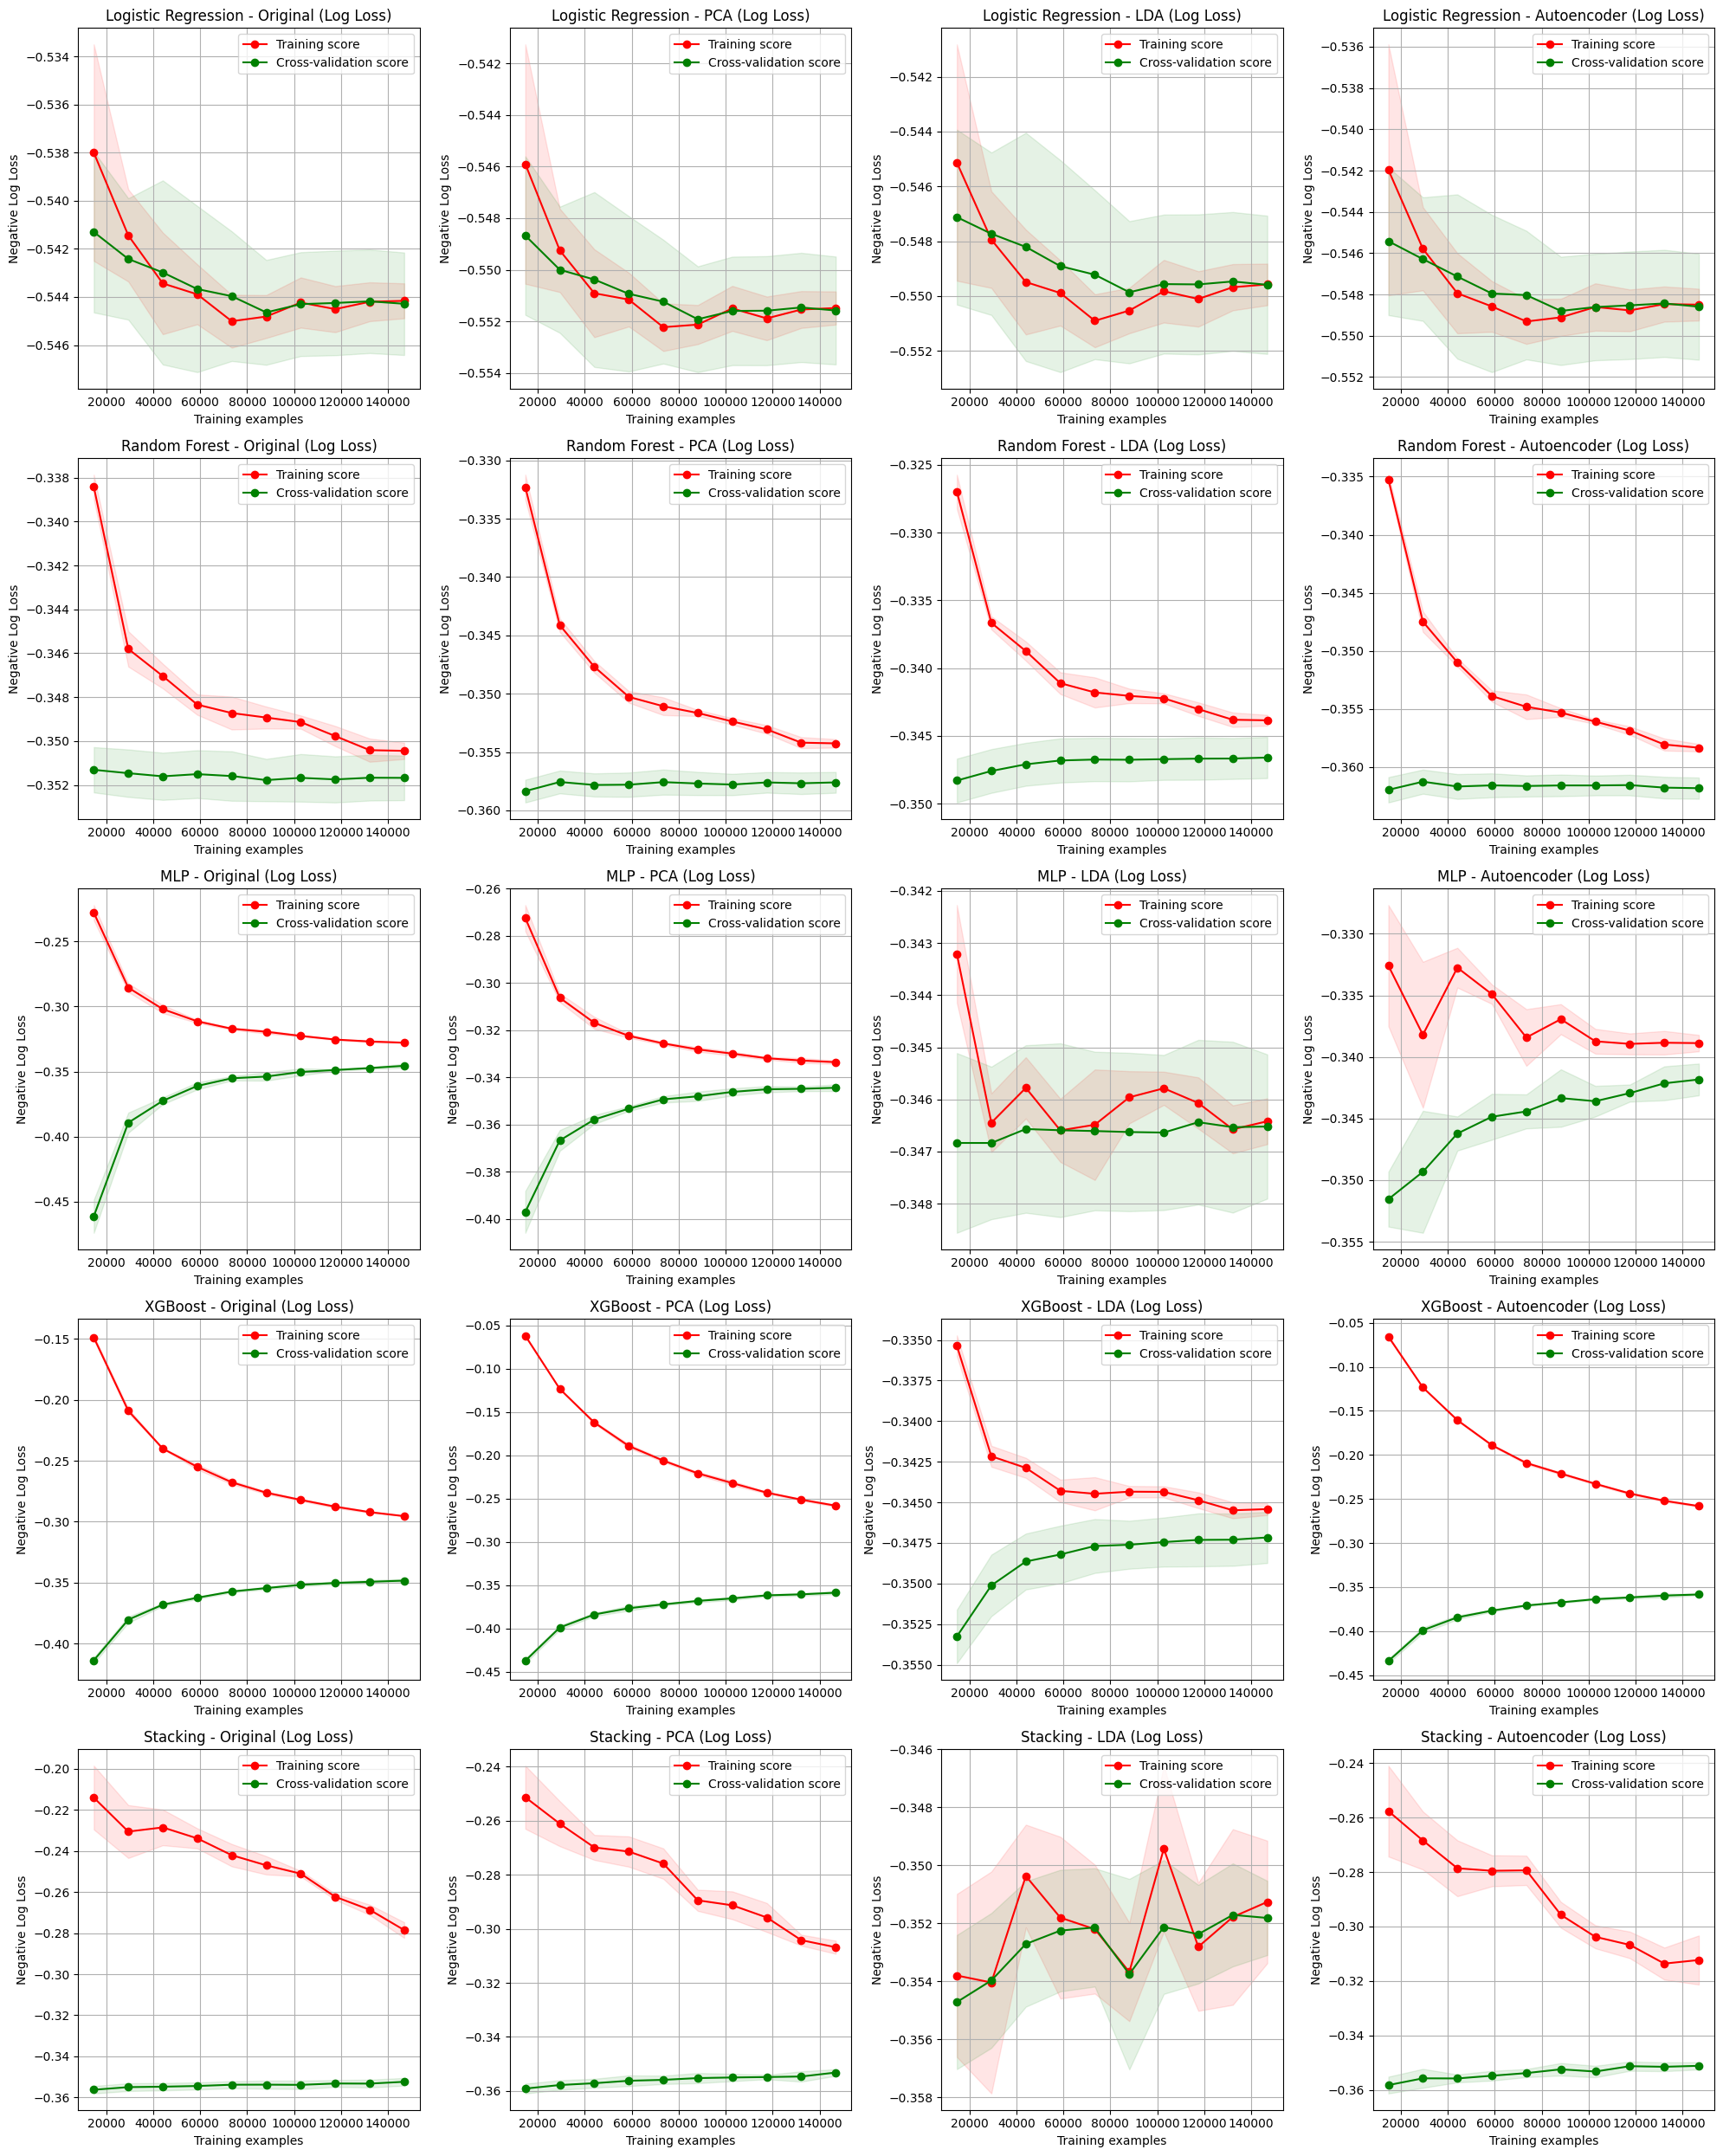

In [66]:
def plot_learning_curve(model, X, y, title, ax, scoring='accuracy'):
    # Adjust the learning_curve function call to include the scoring parameter
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring=scoring
    )
 
    # Calculate means and standard deviations
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
 
    # Plot learning curves
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, val_scores_mean - val_scores_std,
                    val_scores_mean + val_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    ax.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
 
    ax.set_title(title)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score' if scoring == 'accuracy' else 'Negative Log Loss')
    ax.grid()
    ax.legend(loc="best")
 
 
# Define your models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=0, class_weight='balanced', solver="liblinear"),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=0, max_depth=6),
    'MLP': MLPClassifier(max_iter=500),
    'XGBoost': XGBClassifier(n_estimators=200, use_label_encoder=False, eval_metric='logloss'),
    'Stacking': StackingClassifier(estimators=[('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('mlp', MLPClassifier())])
}
 
# Assign datasets for original transformations
original_datasets = {
    'Original': (x_train_sd, y_train),
    'PCA': (X_train_pca, y_train),
    'LDA': (X_train_lda, y_train),
    'Autoencoder': (X_train_auto_imbal, y_train)
}
 
# Prepare the layout for the subplots
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot log loss curves for original datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in original_datasets.items():
        title = f"{model_name} - {transformation_name} (Log Loss)"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index], scoring='neg_log_loss')
        ax_index += 1
 
plt.tight_layout()
plt.savefig('original_datasets_log_loss_curves.png', dpi=300)
plt.show()

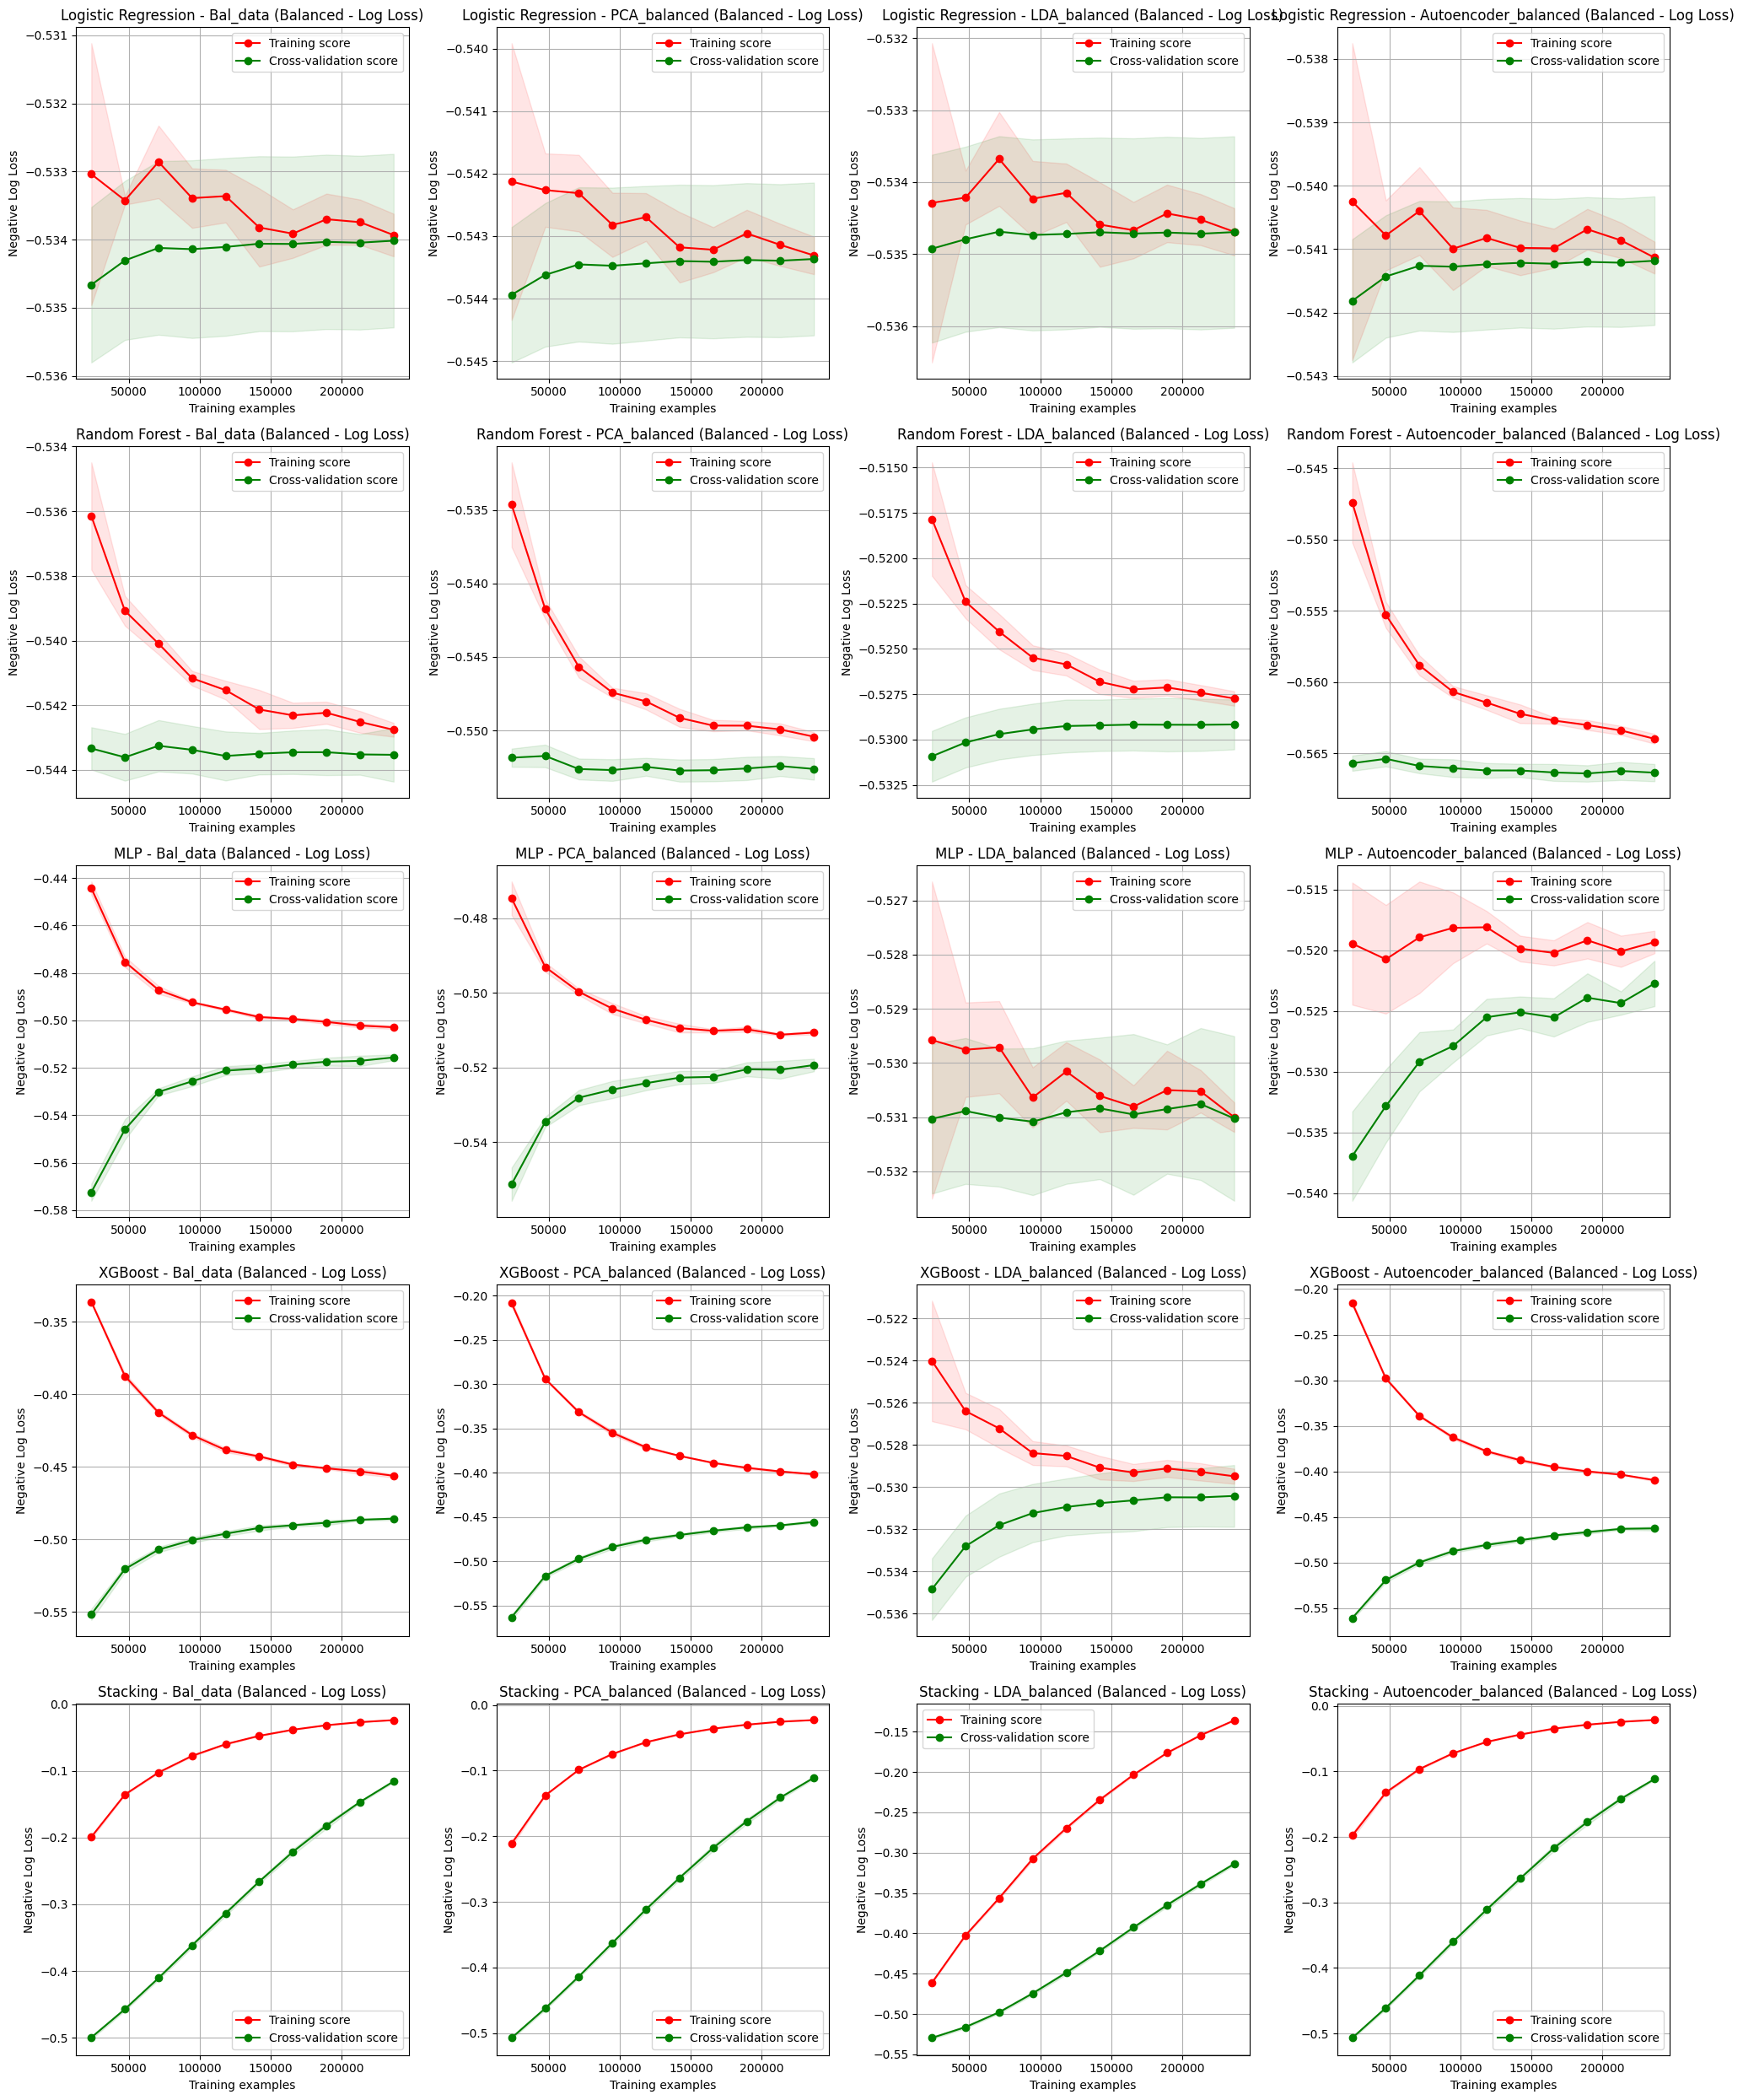

In [67]:
# Assign datasets for balanced transformations
balanced_datasets = {
    'Bal_data': (x_bal_train_sd, y_bal_train),
    'PCA_balanced': (x_bal_train_pca, y_bal_train),
    'LDA_balanced': (x_bal_train_lda, y_bal_train),
    'Autoencoder_balanced': (x_bal_train_auto, y_bal_train)
}
 
# Prepare the layout for the subplots for balanced datasets
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  # Adjust the figsize as needed
axs = axs.flatten()  # Flatten the array of axes for easy iteration
 
# Plot log loss curves for balanced datasets
ax_index = 0
for model_name, model in models.items():
    for transformation_name, (X_trans, y_trans) in balanced_datasets.items():
        title = f"{model_name} - {transformation_name} (Balanced - Log Loss)"
        plot_learning_curve(model, X_trans, y_trans, title, axs[ax_index], scoring='neg_log_loss')
        ax_index += 1
 
plt.tight_layout()
plt.savefig('balanced_datasets_log_loss_curves.png', dpi=300)
plt.show()

Given the larger dataset size, models began with a lower log loss, implying better initial predictions.

The application of PCA and autoencoders on the original data improved performance, and this improvement was more pronounced once the data was balanced.

Balancing the data made a significant positive impact, with both PCA and autoencoders showing low log loss values.

The best model for the BRFSS dataset was also the one using PCA on balanced data, which showed a consistent reduction in log loss, suggesting a high degree of model certainty and correctness.